<a href="https://colab.research.google.com/github/maiullyDev/amazon-data-analysis/blob/main/proj4_colab_mai_anne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Amazon Analysis**

Nesse projeto, temos como objetivo principal deste projeto analisar os fatores que mais influenciam a satisfação do cliente em produtos vendidos na Amazon.

A análise buscará identificar padrões e tendências que possam ajudar a entender melhor os fatores determinantes para avaliações positivas ou negativas, fornecendo insights para otimização de estratégias de vendas e marketing.

# **Imports**

*📍* Imports são a forma de incluir módulos (arquivos de código Python) ou pacotes (coleções de módulos). Isso permite acessar e utilizar funções, classes, variáveis e constantes definidas nesses módulos sem precisar reescrevê-las.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import plotly.express as px

from scipy.stats import normaltest, shapiro, ttest_ind, mannwhitneyu, kruskal
from sklearn.linear_model import LinearRegression
from tabulate import tabulate

# Tabelas

📍 Tabelas utilizadas para essa análise.

In [2]:
review = pd.read_csv("https://docs.google.com/spreadsheets/d/1XmWsJM8BH8alTV3_tM_amA1sYTl8hcbZyV-uvg9slDo/export?format=csv")

In [3]:
product = pd.read_csv("https://docs.google.com/spreadsheets/d/1jP7H8lcwyS5SIsaOR6ivHUa6D7vewJYrh9Kj0cJypWM/export?format=csv")

# **Informações sobre as Tabelas**

📍 Informações básicas sobre a tabela review e sobre a tabela product.

## **Tabela review**


---



**Sobre a tabela review:**

* A tabela review é como um grande repositório de opiniões de clientes sobre os produtos vendidos na Amazon. Cada linha dessa tabela captura a avaliação de um usuário sobre um produto específico. Ela nos mostra quem fez a avaliação, o que foi dito, e fornece detalhes tanto sobre o avaliador quanto sobre o produto que está sendo discutido. Em outras palavras, é uma coleção de feedbacks dos clientes, ajudando a entender melhor a experiência de compra de cada pessoa.

**Insumos da tabela review:**

- user_id: ID do usuário que escreveu a avaliação do produto
- user_name: nome do usuário que escreveu a avaliação do produto
- Review_id: ID da avaliação do usuário
- Review_title: Breve avaliação do usuário
- Review_content: Avaliação completa do usuário
- Img_link: link da imagem do produto
- Product_link: Link para o site oficial do produto
- Product_id: ID do produto
- Rating: Classificação do produto
- Rating_count: número de pessoas que votaram na classificação da Amazon.

## **Tabela product**


---



**Sobre a tabela product:**

* A tabela product é como um catálogo detalhado de todos os produtos disponíveis na Amazon. Cada linha nessa tabela representa um produto diferente, com informações como o nome, preços, descontos, e uma descrição do que ele é e o que faz. Basicamente, é um resumo completo de tudo que está à venda, ajudando a entender cada item e suas características principais.

**Insumos da tabela product:**

- product_id: ID do produto
- product_name: nome do produto
- category: categoria do produto
- discounted_price: preço com desconto do produto
- actual_price: preço real do produto
- discount_percentage: porcentagem de desconto do produto
- about_product: Descrição sobre o produto

# **Tabela review**

## **Prévia da tabela review**


---



In [4]:
review.head(2)

,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B07JW9H4J1,4.2,"24,269"
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,B098NS6PVG,4,"43,994"


## **Informações sobre os dados da tabela review**


---



In [5]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         1465 non-null   object
 1   user_name       1465 non-null   object
 2   review_id       1465 non-null   object
 3   review_title    1465 non-null   object
 4   review_content  1465 non-null   object
 5   img_link        999 non-null    object
 6   product_link    999 non-null    object
 7   product_id      1465 non-null   object
 8   rating          1465 non-null   object
 9   rating_count    1463 non-null   object
dtypes: object(10)
memory usage: 114.6+ KB


Observações:
* Total de linhas da tabela: 1465.
* Existem valores nulos nas colunas img_link, product_link, e rating_count.
* Todas as colunas são do tipo object.

## **Dados fora do escopo**


---



📍 Excluir dados que não foram considerados necessários para a análise. Para essa análise, a coluna rating_count foi excluída.

### **Excluir a coluna rating_count**

A coluna rating_count contém dados sobre o número de pessoas que votaram na classificação da Amazon. Essa coluna não foi considerada necessária para essa análise.

In [6]:
# Dropar a coluna rating_count:
review = review.drop('rating_count', axis=1)

## **Nulos**


---



📍 Identificar e tratar dados nulos da coluna review.

#### **Total de dados nulos**



In [7]:
review_null = review.isnull().sum()
print(review_null)

user_id             0
user_name           0
review_id           0
review_title        0
review_content      0
img_link          466
product_link      466
product_id          0
rating              0
dtype: int64


Observações sobre o total de valores nulos:
* As colunas img_link e product_link contêm 466 valores nulos.

#### **Tratar dados nulos**


---



In [8]:
# Substituir dados nulos pela string "indisponível":
review['img_link'] = review['img_link'].fillna("indisponível")
review['product_link'] = review['product_link'].fillna("indisponível")

In [9]:
# Conferir o total de nulos após alteração:
review_null = review.isnull().sum()
print(review_null)

user_id           0
user_name         0
review_id         0
review_title      0
review_content    0
img_link          0
product_link      0
product_id        0
rating            0
dtype: int64


## **Duplicados**


---



📍 Identificar e tratar dados duplicados da tabela review.

#### **Total de linhas duplicadas**

In [10]:
review_duplicated = review.duplicated().sum()
print("Total de linhas duplicadas: ",review_duplicated)

Total de linhas duplicadas:  0


Foi possível observar que a tabela review não possui linhas inteiramente duplicadas.

#### **Verificar combinações em que user_id, product_id e review_id se repetem**

Essa análise foi feita para verificar se existem ocorrências de reviews com o mesmo ID de usuário, mesmo ID de produto e mesmo ID de review. Isso é importante para identificar se uma mesma review foi repetida na tabela.

In [11]:
# Contar a frequência de cada combinação das colunas user_id, product_id e review_id:
combinations_count = review.groupby(['user_id', 'product_id', 'review_id']).size().reset_index(name='combinations')
combinations_count

,user_id,product_id,review_id,combinations
0,"AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZA...",B07ZR4S1G4,"RN7RYZ9MBIC42,R2N4UBCVLGVVTW,R2E80AM1QM7WZ3,R2...",1
1,"AE23RS3W7GZO7LHYKJU6KSKVM4MQ,AEQUNEY6GQOTEGUMS...",B00HVXS7WC,"R143O8SM7QE4W5,RQBZ31QLH40O,R3KZC4ST0RAK64,R2P...",1
2,AE242TR3GQ6TYC6W4SJ5UYYKBTYQ,B09XJ1LM7R,R38OAD16RVS9D4,1
3,"AE27UOZENYSWCQVQRRUQIV2ZM7VA,AGMYSLV6NNOAYES25...",B09V2PZDX8,"R1BFOK13WV2QLM,R3H97FN1H50F7F,R1IY2IDRUJX5O5,R...",1
4,"AE27UOZENYSWCQVQRRUQIV2ZM7VA,AGMYSLV6NNOAYES25...",B09V2Q4QVQ,"R1BFOK13WV2QLM,R3H97FN1H50F7F,R1IY2IDRUJX5O5,R...",1
...,...,...,...,...
1356,"AHZFKWGDBRQKNMNQ4ZPL52OZBRKA,AGBEFVJFOQIRF7C7K...",B085LPT5F4,"R2F6HAXHI2E0QM,R3ARFHUPI2UTDN,R2NFBRLIKTBYX6,R...",1
1357,"AHZJHJWFZLYD64GVP4PXVI2F4LXA,AEUCRZPOISXKHXMCZ...",B0BJ966M5K,"R410I44U1ORFS,R2EL6RDO42L8HA,R2LMSC4S998NYI,R2...",1
1358,"AHZNSNBVKQR4OGJAQHE4DCDA4YHA,AFBW6COTZXGHQMWVD...",B0B3MWYCHQ,"R1AIQQLE21YDXS,R26ABOIUJ8UXJ7,R93L2MCBC4Y90,R2...",2
1359,"AHZWJCVEIEI76H2VGMUSN5D735IQ,AH2DFUHFTG4CKQFVG...",B09W5XR9RT,"R1Y30KU04V3QF4,RK3DSUGKIZT8Z,R3BIG7J6V2JZTU,R1...",3


Observações:
* Existem combinações de user_id, product_id e review_id que se repetem. Isso indica que existem reviews duplicadas na tabela.

#### **Total de ocorrências em que user_id, product_id e review_id se repetem**

In [12]:
# Contagem do total de linhas em que user_id, product_id e review_id se repetem:
duplicates_total = combinations_count[combinations_count['combinations'] > 1].shape[0]
print("Total de combinações de user_id, product_id e review_id que se repetem:", duplicates_total)

Total de combinações de user_id, product_id e review_id que se repetem: 84


#### **Combinações em que user_id, product_id e review_id se repetem**

In [13]:
# Analisar linhas em que as combinações de user_id, product_id e review_id se repetem:
combinations_count[combinations_count['combinations'] > 1]

,user_id,product_id,review_id,combinations
9,"AE2OFVZSIE6KSBAPG6GMKCER35LA,AFEOAY5PB4XEYIOL6...",B07DJLFMPS,"RPA8V1051ERUL,R2M7ENP70GK5P4,R3PA1IDUY9QNC8,R1...",2
21,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",B08CF3B7N1,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",3
31,"AE47XF2766XJOEOI42DVP2HMB4YQ,AH6JPV326WGUKC2J4...",B07XJYYH7L,"RWSHFGBE1WU3I,R1VBNTH3HSMVMB,RTATA9H2ELJ81,R1B...",2
51,"AE6CROVUGPHR7BRT5JASNRWSPBVQ,AHL5MROK5N63VXVBM...",B096VF5YYF,"R1ZQQKZCCG4KD2,R1OHAWNCB4K26S,R1A7EDRAMKIXJ6,R...",2
73,"AEAX7BRPDS3NSYCZQBQDL5DGZDVA,AFI76LT4UP2L3SFJM...",B0B9BD2YL4,"R1HOV97NOJFX4W,R3BIRU7WH404ND,RAU26U2KP1OQH,R1...",2
...,...,...,...,...
1303,"AHUH7OYN3LAUATF5EGA575WCDI6A,AFQRX6TAM6CHKARXI...",B09RZS1NQT,"RW294SCHB5QTK,R24AGC1O5RVWYI,R3NT7AA2V3I2FB,R2...",2
1320,"AHVZCQP5SYIVGZJK4LRP55ZXWETA,AF6YDBL3KYIK3LBKK...",B01GGKYKQM,"R1BC08IFG4REKS,R1FJKIHIO54SOW,R3JR48W2CI480,R3...",3
1322,"AHW6E5LQ2BDYOIVLAJGDH45J5V5Q,AF74RSGCHPZITVFSZ...",B08DDRGWTJ,"R2X090D1YHACKR,R32ZCIH9AFNJ60,R3N57EVVG0EHAF,R...",3
1358,"AHZNSNBVKQR4OGJAQHE4DCDA4YHA,AFBW6COTZXGHQMWVD...",B0B3MWYCHQ,"R1AIQQLE21YDXS,R26ABOIUJ8UXJ7,R93L2MCBC4Y90,R2...",2


**Buscar linhas por ID para conferir as ocorrências em que as combinações de user_id, product_id e review_id se repetem**

In [14]:
review[review['product_id'] == "B0B9BD2YL4"]

,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating
583,"AEAX7BRPDS3NSYCZQBQDL5DGZDVA,AFI76LT4UP2L3SFJM...","Ak,Jitesh,anil,Umpo,G'DAS ENTERPRISES,Neetu,Va...","R1HOV97NOJFX4W,R3BIRU7WH404ND,RAU26U2KP1OQH,R1...","Quite Good,good pencil,Value for money,Brillia...",After 10 days of use bhaut acha chl rha ha and...,https://m.media-amazon.com/images/I/217Lv1D3bH...,https://www.amazon.in/Wireless-Generation-Sens...,B0B9BD2YL4,4.5
1017,"AEAX7BRPDS3NSYCZQBQDL5DGZDVA,AFI76LT4UP2L3SFJM...","Ak,Jitesh,anil,Umpo,G'DAS ENTERPRISES,Neetu,Va...","R1HOV97NOJFX4W,R3BIRU7WH404ND,RAU26U2KP1OQH,R1...","Quite Good,good pencil,Value for money,Brillia...",After 10 days of use bhaut acha chl rha ha and...,indisponível,indisponível,B0B9BD2YL4,4.5


Observações:
* No produto cujo product_id é B0B9BD2YL4, os links de img_link e product_link estão indisponíveis em uma das ocorrências. Esse problema não aparece em todas as ocorrências analisadas nesta seção.

#### **Total de ocorrências em que user_id, product_id, review_id e rating se repetem**

In [15]:
# Contar a frequência de cada combinação única das colunas user_id, product_id, review_id e rating:
combinations_count_2 = review.groupby(['user_id', 'product_id', 'review_id', 'rating']).size().reset_index(name='combinations')

# Contagem do total de ocorrências em que user_id, product_id, review_id e rating se repetem.
duplicates_total_2 = combinations_count_2[combinations_count_2['combinations'] > 1].shape[0]
print("Total de combinações de user_id, product_id, review_id e rating que se repetem:", duplicates_total_2)

Total de combinações de user_id, product_id, review_id e rating que se repetem: 84


É interessante notar que o número de ocorrências em que user_id, product_id e review_id se repetem é igual ao número de ocorrências em que user_id, product_id, review_id e **rating** se repetem. A partir dessa observação, inferi que sempre que uma combinação de user_id, product_id e review_id se repete, o valor de rating também se repete. Por isso, optei por calcular a média dos valores de rating ao agrupar os dados por user_id, product_id e review_id.

#### **Tratar linhas duplicadas**

Para tratar as linhas duplicadas, agrupei os dados por 'user_id', 'product_id' e 'review_id' e calculei a média de 'rating'.

In [16]:
# Analisar linha que contém valor não numérico na coluna rating:
review[review['rating'] == "|"]

,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating
1279,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",indisponível,indisponível,B08L12N5H1,|


In [17]:
# Excluir a linha que contém a string "|":
review.drop(review[review['rating'] == "|"].index, inplace=True)

In [18]:
# Converter a coluna review de object para float:
review['rating'] = review['rating'].astype(float)

In [19]:
# Calcular a média dos valores da coluna rating para as linhas com valores duplicados:
review_unique = review.groupby(['user_id', 'product_id', 'review_id'], as_index=False)['rating'].mean()

In [20]:
# Tabela livre repetições:
review_unique.head(3)

,user_id,product_id,review_id,rating
0,"AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZA...",B07ZR4S1G4,"RN7RYZ9MBIC42,R2N4UBCVLGVVTW,R2E80AM1QM7WZ3,R2...",4.4
1,"AE23RS3W7GZO7LHYKJU6KSKVM4MQ,AEQUNEY6GQOTEGUMS...",B00HVXS7WC,"R143O8SM7QE4W5,RQBZ31QLH40O,R3KZC4ST0RAK64,R2P...",4.2
2,AE242TR3GQ6TYC6W4SJ5UYYKBTYQ,B09XJ1LM7R,R38OAD16RVS9D4,4.3


In [21]:
# Confirmar que a tabela está livre de combinações repetidas de user_id, product_id e review_id:
combinations_count_2 = review_unique.groupby(['user_id', 'product_id', 'review_id']).size().reset_index(name='combinations')
duplicates_total_2 = combinations_count_2[combinations_count_2['combinations'] > 1].shape[0]
print("Total de combinações de user_id, product_id e review_id que se repetem:", duplicates_total_2)

Total de combinações de user_id, product_id e review_id que se repetem: 0


 Após o processo de limpeza dos dados, o total de combinações repetidas dos valores de 'user_id', 'product_id' e 'review_id' passou de 84 para 0. Agora, tenho uma nova tabela contendo os dados tratados, a tabela review_unique.

In [22]:
# Unir a tabela review (original) com a tabela review_unique (tabela review livre de combinações duplicadas), para gerar uma única tabela com todas as variáveis:
review_2 = pd.merge(review_unique, review, on=['user_id', 'product_id', 'review_id'], how='left')
review_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         1464 non-null   object 
 1   product_id      1464 non-null   object 
 2   review_id       1464 non-null   object 
 3   rating_x        1464 non-null   float64
 4   user_name       1464 non-null   object 
 5   review_title    1464 non-null   object 
 6   review_content  1464 non-null   object 
 7   img_link        1464 non-null   object 
 8   product_link    1464 non-null   object 
 9   rating_y        1464 non-null   float64
dtypes: float64(2), object(8)
memory usage: 114.5+ KB


In [23]:
# Filtrar apenas as variáveis necessárias:
filtered_review = review_2[['user_id', 'product_id', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link', 'rating_x']]
filtered_review.head(3)

,user_id,product_id,review_id,review_title,review_content,img_link,product_link,rating_x
0,"AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZA...",B07ZR4S1G4,"RN7RYZ9MBIC42,R2N4UBCVLGVVTW,R2E80AM1QM7WZ3,R2...","Excellent solution for Sony TVs,Worth purchase...",Sometimes its simple solutions that come to re...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Universal-Remote-Control...,4.4
1,"AE23RS3W7GZO7LHYKJU6KSKVM4MQ,AEQUNEY6GQOTEGUMS...",B00HVXS7WC,"R143O8SM7QE4W5,RQBZ31QLH40O,R3KZC4ST0RAK64,R2P...","Just go for it.👍🏻,3 PIN Plug should be there,M...","Product is so good but packaging was so bad😠.,...",indisponível,indisponível,4.2
2,AE242TR3GQ6TYC6W4SJ5UYYKBTYQ,B09XJ1LM7R,R38OAD16RVS9D4,do not buy,"tv on off not working, so difficult to battery...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/7SEVEN%C2%AE-Compatible-...,4.3


# **Tabela product**

## **Prévia da tabela product**


---



In [24]:
product.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,High Compatibility : Compatible With iPhone 12...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,"Compatible with all Type C enabled devices, be..."


## **Informações sobre os dados da tabela product**


---



In [25]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1469 non-null   object
 1   product_name         1469 non-null   object
 2   category             1469 non-null   object
 3   discounted_price     1469 non-null   object
 4   actual_price         1469 non-null   object
 5   discount_percentage  1469 non-null   object
 6   about_product        1465 non-null   object
dtypes: object(7)
memory usage: 80.5+ KB


Observações:
* Total de linhas: 1469.
* Existem valores nulos na coluna about_product.
* Todas as colunas são do tipo object.

## **Converter tipo de dado**


---



Converter tipo de dado de string para float.

In [26]:
product['discounted_price'] = product['discounted_price'].str.replace('₹', '')
product['actual_price'] = product['actual_price'].str.replace('₹', '')
product['discount_percentage'] = product['discount_percentage'].str.replace('%', '')

In [27]:
#product.head(3)

In [28]:
# Ver valores de 'discounted_price':
## product['discounted_price'].unique()
# Ver valores de 'actual_price'
## product['actual_price'].unique()

In [29]:
# Substituir vírgulas por uma string vazia, pois os valores estão no padrão estadunidense:
product['discounted_price'] = product['discounted_price'].str.replace(',', '')
product['actual_price'] = product['actual_price'].str.replace(',', '')

In [30]:
# Converter o tipo das colunas discounted_price, actual_price, e discounted_percentage de object para float:
product['discounted_price'] = product['discounted_price'].astype(float)
product['actual_price'] = product['actual_price'].astype(float)
product['discount_percentage'] = product['discount_percentage'].astype(float)

## **Nulos**


---



#### **Total de dados nulos**

In [31]:
product_null = product.isnull().sum()
print(product_null)

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
about_product          4
dtype: int64


Observações sobre o total de valores nulos:
* A coluna about_product possui 4 valores nulos.

## **Duplicados**


---



#### **Total de linhas duplicadas**

In [32]:
product_duplicated = product.duplicated().sum()
print("Total de linhas duplicadas: ", product_duplicated)

Total de linhas duplicadas:  106


#### **Ver linhas duplicadas**

In [33]:
duplicate_lines = product[product.duplicated()]
duplicate_lines

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
369,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,High Compatibility : Compatible With iPhone 12...
377,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,"Compatible with all Type C enabled devices, be..."
392,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,The boAt Deuce USB 300 2 in 1 cable is compati...
393,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...
403,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,149.0,1000.0,85.0,Fast Charging & Data Sync: Solero TB301 Type-C...
...,...,...,...,...,...,...,...
1007,B0B9BXKBC7,"WeCool S5 Long Selfie Stick, with Large Reinfo...",Electronics|Mobiles&Accessories|MobileAccessor...,1799.0,3999.0,55.0,"64"" Tall Cell Phone Tripods with 7 section adj..."
1010,B07GVGTSLN,Wayona Usb Type C Fast Charger Cable Fast Char...,Computers&Accessories|Accessories&Peripherals|...,325.0,1299.0,75.0,Fast Charge & Data Sync: Fast charge& data tra...
1017,B0B9BD2YL4,KINGONE Wireless Charging Pencil (2nd Generati...,Electronics|Mobiles&Accessories|MobileAccessor...,2599.0,6999.0,63.0,【2022 latest iPad Magnetic Charging】 The lates...
1018,B0BMXMLSMM,Lapster 65W compatible for OnePlus Dash Warp C...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,80.0,-1 meter type c to c cable fast charging cable...


#### **Buscar linhas por ID**

In [34]:
product[product['product_id'] == "B07JW9H4J1"]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,High Compatibility : Compatible With iPhone 12...
369,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,High Compatibility : Compatible With iPhone 12...
614,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,High Compatibility : Compatible With iPhone 12...


#### **Excluir  linhas duplicadas**

Criei uma nova tabela com os dados da tabela product, livre de linhas duplicadas. Nomeei a tabela como product_no_duplicates.

In [35]:
product_no_duplicates = product.drop_duplicates()

#### **Verificar a existência de IDs de produto duplicados**

In [36]:
# Contar as ocorrências de cada `product_id`:
duplicates_product_id = product_no_duplicates["product_id"].value_counts().reset_index(name='count_product_id')
duplicates_product_id

,product_id,count_product_id
0,B096MSW6CT,3
1,B01486F4G6,2
2,B08CF3D7QR,2
3,B0B5B6PQCT,2
4,B09MT84WV5,2
...,...,...
1346,B0B244R4KB,1
1347,B01F25X6RQ,1
1348,B07WJWRNVK,1
1349,B0B53QFZPY,1


Observações:
* Existem IDs de produtos duplicados.

#### **Buscar linhas por ID de produto**

In [37]:
product_no_duplicates[product_no_duplicates['product_id'] == "B096MSW6CT"]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,【 Fast Charger& Data Sync】-With built-in safet...
379,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,80.0,【 Fast Charger& Data Sync】-With built-in safet...
623,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,80.0,【 Fast Charger& Data Sync】-With built-in safet...


Observações:
* Existem IDs de produtos que se repetem, mas com preços diferentes e, portanto, com percentuais de desconto diferentes.

#### **IDs de produto que se repetem**

In [38]:
# Identificar o total de IDs de produto que se repetem:
total_duplicates_product_id = duplicates_product_id[duplicates_product_id['count_product_id'] > 1].shape[0]
print("Total de IDs de produto que se repetem:", total_duplicates_product_id)

Total de IDs de produto que se repetem: 11


In [39]:
# IDs de produto que se repetem:
duplicates_product_id[duplicates_product_id['count_product_id'] > 1]

,product_id,count_product_id
0,B096MSW6CT,3
1,B01486F4G6,2
2,B08CF3D7QR,2
3,B0B5B6PQCT,2
4,B09MT84WV5,2
5,B07DJLFMPS,2
6,B083342NKJ,2
7,B0B5LVS732,2
8,B01M6453MB,2
9,B00J5DYCCA,2


#### **Filtro de linhas por ID de produto na tabela duplicated_rows**


In [40]:
product_no_duplicates[product_no_duplicates['product_id'] == "B009P2LIL4"]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,28.0,International design and styling|Two heat sett...
1466,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,28.0,NaN


**Observações sobre cada caso em que product_id se repete:**

➡️ 0) product_id B096MSW6CT (diferentes discounted_price e discount_percentage)

* Total de ocorrências: 3.
* Ação: Excluir todas as ocorrências.

➡️ 1) product_id B01486F4G6 (about_product = NaN)

* Total de ocorrências: 2.
* Ação: Excluir o índice 1468, ocorrência em que about_product é igual a NaN.

➡️ 2) product_id B08CF3D7QR	(discounted_price, actual_price e discount_percentage iguais)

* Total de ocorrências: 2.
* Ação: Excluir o índice 428, a primeira ocorrência.

➡️ 3) product_id B0B5B6PQCT (diferentes discounted_price e discount_percentage)

* Total de ocorrências: 2.
* Ação: Excluir todas as ocorrências.

➡️ 4) product_id B09MT84WV5	(diferentes discounted_price e discount_percentage)

* Total de ocorrências: 2.
* Ação: Excluir todas as ocorrências.

➡️ 5) product_id B07DJLFMPS	(discounted_price, actual_price e discount_percentage iguais)

* Total de ocorrências: 2.
* Ação: Excluir a primeira ocorrência.

➡️ 6) product_id B083342NKJ	(discounted_price, actual_price e discount_percentage iguais)

* Total de ocorrências: 2.
* Ação: Excluir a primeira ocorrência.

➡️ 7) product_id B0B5LVS732 (diferentes discounted_price e discount_percentage)

* Total de ocorrências: 2.
* Ação: Excluir todas as ocorrências.

➡️ 8) product_id B01M6453MB (about_product = NaN)

* Total de ocorrências: 2.
* Ação: Excluir o índice 1465, ocorrência em que about_product é igual a NaN.

➡️ 9) product_id B00J5DYCCA (about_product = NaN)

* Total de ocorrências: 2.
* Ação: Excluir o índice 1467, ocorrência em que about_product é igual a NaN.

➡️ 10) product_id B009P2LIL4 (about_product = NaN)

* Total de ocorrências: 2.
* Ação: Excluir o índice 1466, ocorrência em que about_product é igual a NaN.

#### **Excluir IDs de produto repetidos caso a caso**

In [41]:
# 0) product_id B096MSW6CT:
product_no_duplicates.drop(product_no_duplicates[product_no_duplicates['product_id'] == "B096MSW6CT"].index, inplace=True)

# 1) product_id B01486F4G6:
product_no_duplicates.drop(1468, inplace=True)

# 2) product_id B08CF3D7QR:
product_no_duplicates.drop(10, inplace=True)

# 3) product_id B0B5B6PQCT:
product_no_duplicates.drop(product_no_duplicates[product_no_duplicates['product_id'] == "B0B5B6PQCT"].index, inplace=True)

# 4) product_id B09MT84WV5:
product_no_duplicates.drop(product_no_duplicates[product_no_duplicates['product_id'] == "B09MT84WV5"].index, inplace=True)

# 5) product_id B07DJLFMPS:
product_no_duplicates.drop(686, inplace=True)

# 6) product_id B083342NKJ:
product_no_duplicates.drop(15, inplace=True)

# 7) product_id B0B5LVS732:
product_no_duplicates.drop(product_no_duplicates[product_no_duplicates['product_id'] == "B0B5LVS732"].index, inplace=True)

# 8) product_id B01M6453MB:
product_no_duplicates.drop(1465, inplace=True)

# 9) product_id B00J5DYCCA:
product_no_duplicates.drop(1467, inplace=True)

# 10) product_id B009P2LIL4:
product_no_duplicates.drop(1466, inplace=True)

<ipython-input-41-6cd88889f8b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_no_duplicates.drop(product_no_duplicates[product_no_duplicates['product_id'] == "B096MSW6CT"].index, inplace=True)
<ipython-input-41-6cd88889f8b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_no_duplicates.drop(1468, inplace=True)
<ipython-input-41-6cd88889f8b6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_no_duplicates.drop

**Verificar se ainda existem IDs de produto que se repetem:**

In [42]:
# Contar as ocorrências de cada `product_id`:
duplicates_product_id = product_no_duplicates["product_id"].value_counts().reset_index(name='count_product_id')

# Identificar o total de IDs de produto que se repetem:
total_duplicates_product_id = duplicates_product_id[duplicates_product_id['count_product_id'] > 1].shape[0]
print("Total de IDs de produto que se repetem:", total_duplicates_product_id)

Total de IDs de produto que se repetem: 0


# **Unir tabelas reviews e produtos**

In [43]:
# Unir tabelas review_unique e filtered_review:
review_product = pd.merge(filtered_review, product_no_duplicates, on='product_id', how='left')

In [44]:
# Renomear a coluna rating_x:
review_product.rename(columns={'rating_x': 'rating'}, inplace=True)

In [45]:
# Informações sobre a tabela:
review_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              1464 non-null   object 
 1   product_id           1464 non-null   object 
 2   review_id            1464 non-null   object 
 3   review_title         1464 non-null   object 
 4   review_content       1464 non-null   object 
 5   img_link             1464 non-null   object 
 6   product_link         1464 non-null   object 
 7   rating               1464 non-null   float64
 8   product_name         1455 non-null   object 
 9   category             1455 non-null   object 
 10  discounted_price     1455 non-null   float64
 11  actual_price         1455 non-null   float64
 12  discount_percentage  1455 non-null   float64
 13  about_product        1455 non-null   object 
dtypes: float64(4), object(10)
memory usage: 160.2+ KB


**Insumos da tabela:**

* 0 user_id: ID do usuário que escreveu a avaliação do produto
* 1 product_id: ID do produto
* 2 review_id: ID da avaliação do usuário
* 3 review_title: Breve avaliação do usuário
* 4 review_content: Avaliação completa do usuário
* 5 img_link: link da imagem do produto
* 6 product_link: Link para o site oficial do produto
* 7 rating_x: Classificação do produto
* 8 product_name: nome do produto
* 9 category: categoria do produto
* 10 discounted_price: preço com desconto do produto
* 11 actual_price: preço real do produto
* 12 discount_percentage: porcentagem de desconto do produto
* 13 about_product: Descrição sobre o produto

In [46]:
review_product.head(2)

,user_id,product_id,review_id,review_title,review_content,img_link,product_link,rating,product_name,category,discounted_price,actual_price,discount_percentage,about_product
0,"AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZA...",B07ZR4S1G4,"RN7RYZ9MBIC42,R2N4UBCVLGVVTW,R2E80AM1QM7WZ3,R2...","Excellent solution for Sony TVs,Worth purchase...",Sometimes its simple solutions that come to re...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Universal-Remote-Control...,4.4,Universal Remote Control for All Sony TV for A...,"Electronics|HomeTheater,TV&Video|Accessories|R...",239.0,699.0,66.0,"Replacement for Sony RM-YD092 ,Fits with vario..."
1,"AE23RS3W7GZO7LHYKJU6KSKVM4MQ,AEQUNEY6GQOTEGUMS...",B00HVXS7WC,"R143O8SM7QE4W5,RQBZ31QLH40O,R3KZC4ST0RAK64,R2P...","Just go for it.👍🏻,3 PIN Plug should be there,M...","Product is so good but packaging was so bad😠.,...",indisponível,indisponível,4.2,Bajaj Rex 500W Mixer Grinder with Nutri-Pro Fe...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,1999.0,3210.0,38.0,Wattage: 500 W; Voltage: 220-240V ; Revolution...


In [47]:
# Informações sobre a tabela:
review_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              1464 non-null   object 
 1   product_id           1464 non-null   object 
 2   review_id            1464 non-null   object 
 3   review_title         1464 non-null   object 
 4   review_content       1464 non-null   object 
 5   img_link             1464 non-null   object 
 6   product_link         1464 non-null   object 
 7   rating               1464 non-null   float64
 8   product_name         1455 non-null   object 
 9   category             1455 non-null   object 
 10  discounted_price     1455 non-null   float64
 11  actual_price         1455 non-null   float64
 12  discount_percentage  1455 non-null   float64
 13  about_product        1455 non-null   object 
dtypes: float64(4), object(10)
memory usage: 160.2+ KB


# **Variáveis numéricas**

➡️ Informações sobre as variáveis numéricas da tabela review_product

In [48]:
review_product.describe()

,rating,discounted_price,actual_price,discount_percentage
count,1464.000000,1455.000000,1455.000000,1455.000000
mean,4.096585,3138.131567,5454.666172,47.548454
std,0.291674,6966.121784,10909.686316,21.581367
min,2.000000,39.000000,39.000000,0.000000
25%,4.000000,325.000000,800.000000,32.000000
50%,4.100000,799.000000,1639.000000,50.000000
75%,4.300000,1999.000000,4292.500000,63.000000
max,5.000000,77990.000000,139900.000000,94.000000


## **Variável rating**

In [49]:
px.histogram(review_product, x='rating')

In [50]:
px.box(review_product, x='rating')

## **Variável discounted_price**

In [51]:
px.histogram(review_product, x='discounted_price')

In [52]:
px.box(review_product, x='discounted_price')

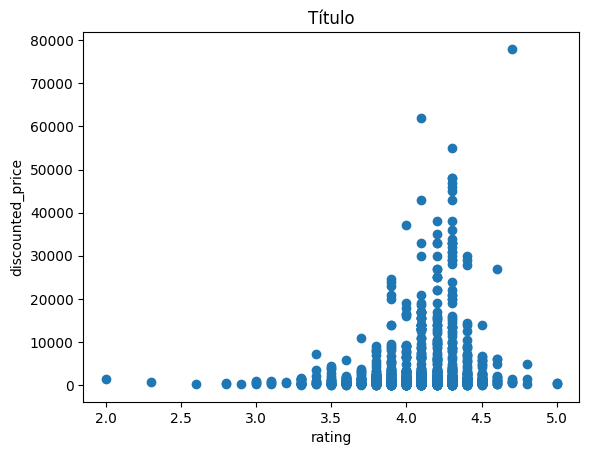

In [53]:
# Gráfico de dispersão:
plt.scatter(review_product['rating'], review_product['discounted_price'])
plt.xlabel('rating')
plt.ylabel('discounted_price')
plt.title('Título')
plt.show()

## **Variável actual_price**

In [54]:
px.histogram(review_product, x='actual_price')

In [55]:
px.box(review_product, x='actual_price')

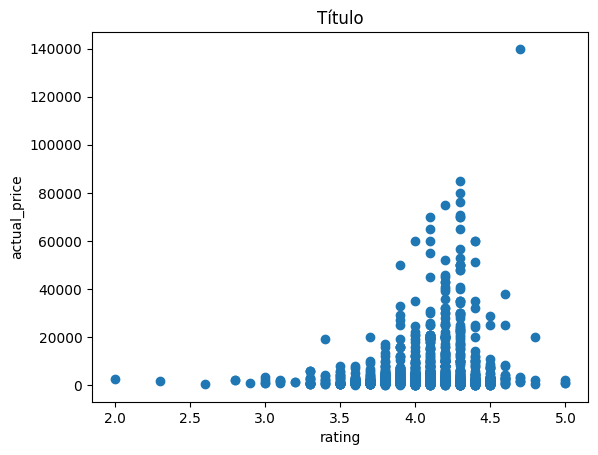

In [56]:
# Gráfico de dispersão:
plt.scatter(review_product['rating'], review_product['actual_price'])
plt.xlabel('rating')
plt.ylabel('actual_price')
plt.title('Título')
plt.show()

## **Variável discount_percentage**

In [57]:
px.histogram(review_product, x='discount_percentage')

In [58]:
px.box(review_product, x='discount_percentage')

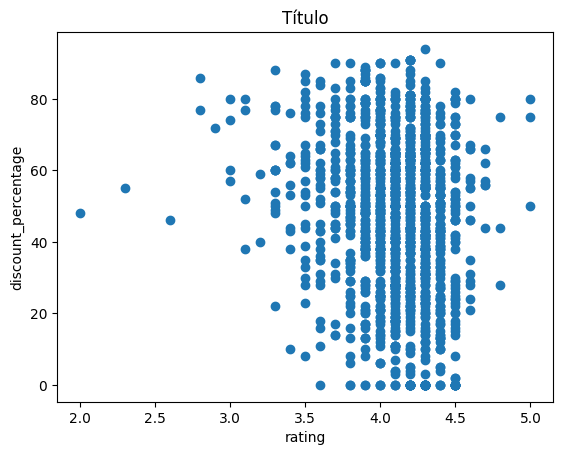

In [59]:
# Gráfico de dispersão:
plt.scatter(review_product['rating'], review_product['discount_percentage'])
plt.xlabel('rating')
plt.ylabel('discount_percentage')
plt.title('Título')
plt.show()

# **Categorias de produto**

➡️ Análise das avaliações por categoria de produto.

In [60]:
# Melhorar a visualização dos dados na variável category:
review_product['category'] = review_product['category'].str.replace('|', ',')

In [61]:
review_product.groupby('category').median('rating')

,rating,discounted_price,actual_price,discount_percentage
category,,,,
"Car&Motorbike,CarAccessories,InteriorAccessories,AirPurifiers&Ionizers",3.80,2339.0,4000.0,42.0
"Computers&Accessories,Accessories&Peripherals,Adapters,USBtoUSBAdapters",4.15,221.5,2699.0,78.5
"Computers&Accessories,Accessories&Peripherals,Audio&VideoAccessories,PCHeadsets",3.50,649.0,999.0,35.0
"Computers&Accessories,Accessories&Peripherals,Audio&VideoAccessories,PCMicrophones",3.60,574.0,1249.5,56.5
"Computers&Accessories,Accessories&Peripherals,Audio&VideoAccessories,PCSpeakers",4.05,749.0,1399.5,46.5
...,...,...,...,...
"OfficeProducts,OfficePaperProducts,Paper,Stationery,Pens,Pencils&WritingSupplies,Pens&Refills,GelInkRollerballPens",4.25,150.0,150.0,0.0
"OfficeProducts,OfficePaperProducts,Paper,Stationery,Pens,Pencils&WritingSupplies,Pens&Refills,LiquidInkRollerballPens",4.15,255.0,260.0,5.0
"OfficeProducts,OfficePaperProducts,Paper,Stationery,Pens,Pencils&WritingSupplies,Pens&Refills,RetractableBallpointPens",4.30,329.0,405.0,17.5


In [62]:
# Função para resumir as categorias em categorias mais gerais:
def summarize_categories(text):
  if isinstance(text, str): # Check if the value is a string
    return text.split(',')[0]
  else:
    return text # Return the original value if it's not a string

In [63]:
# Aplicar a função à coluna 'category':
review_product['category'] = review_product['category'].apply(summarize_categories)

In [64]:
review_product.head(3)

,user_id,product_id,review_id,review_title,review_content,img_link,product_link,rating,product_name,category,discounted_price,actual_price,discount_percentage,about_product
0,"AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZA...",B07ZR4S1G4,"RN7RYZ9MBIC42,R2N4UBCVLGVVTW,R2E80AM1QM7WZ3,R2...","Excellent solution for Sony TVs,Worth purchase...",Sometimes its simple solutions that come to re...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Universal-Remote-Control...,4.4,Universal Remote Control for All Sony TV for A...,Electronics,239.0,699.0,66.0,"Replacement for Sony RM-YD092 ,Fits with vario..."
1,"AE23RS3W7GZO7LHYKJU6KSKVM4MQ,AEQUNEY6GQOTEGUMS...",B00HVXS7WC,"R143O8SM7QE4W5,RQBZ31QLH40O,R3KZC4ST0RAK64,R2P...","Just go for it.👍🏻,3 PIN Plug should be there,M...","Product is so good but packaging was so bad😠.,...",indisponível,indisponível,4.2,Bajaj Rex 500W Mixer Grinder with Nutri-Pro Fe...,Home&Kitchen,1999.0,3210.0,38.0,Wattage: 500 W; Voltage: 220-240V ; Revolution...
2,AE242TR3GQ6TYC6W4SJ5UYYKBTYQ,B09XJ1LM7R,R38OAD16RVS9D4,do not buy,"tv on off not working, so difficult to battery...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/7SEVEN%C2%AE-Compatible-...,4.3,7SEVEN® Compatible for Tata Sky Remote Origina...,Electronics,399.0,799.0,50.0,[Compatible] All model of dth SD / HD / HD+ Pl...


In [65]:
review_product_categories = review_product.groupby('category').agg({'rating': ['mean', 'count']})
review_product_categories

rating      
                           mean count
category                             
Car&Motorbike          3.800000     1
Computers&Accessories  4.156667   450
Electronics            4.081923   520
Health&PersonalCare    4.000000     1
Home&Kitchen           4.040716   447
HomeImprovement        4.250000     2
MusicalInstruments     3.900000     2
OfficeProducts         4.309677    31
Toys&Games             4.300000     1

# **Correlação**

➡️ Correlação das variáveis numéricas.

In [66]:
# Variáveis numéricas
numeric_variables = review_product.select_dtypes(include=['float64', 'int64'])
numeric_variables.columns

Index(['rating', 'discounted_price', 'actual_price', 'discount_percentage'], dtype='object')

In [67]:
# Calcular a matriz de correlação de Pearson
correlation_matrix = numeric_variables.corr(method='pearson')
print("\nMatriz de Correlação de Pearson:")
correlation_matrix


Matriz de Correlação de Pearson:


,rating,discounted_price,actual_price,discount_percentage
rating,1.000000,0.120001,0.121774,-0.153398
discounted_price,0.120001,1.000000,0.962048,-0.241713
actual_price,0.121774,0.962048,1.000000,-0.117995
discount_percentage,-0.153398,-0.241713,-0.117995,1.000000


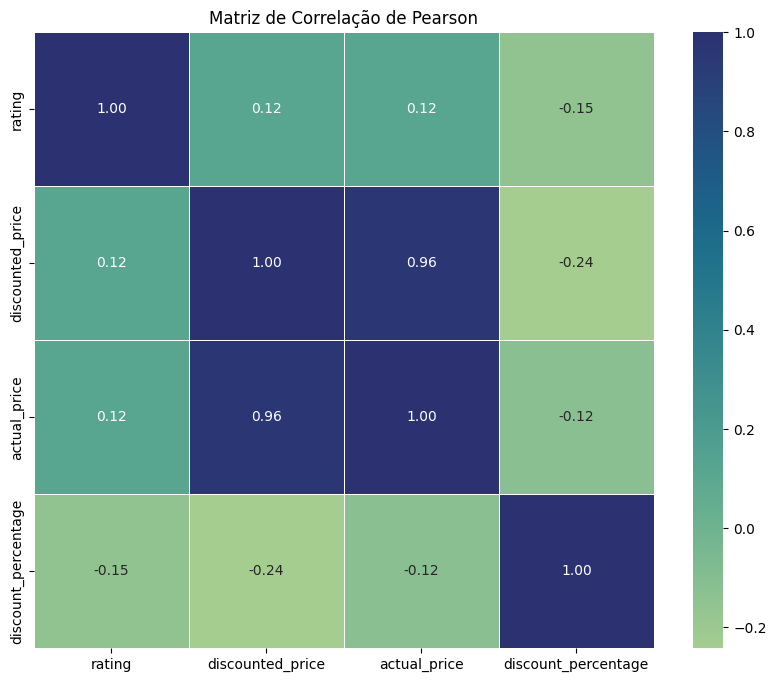

In [68]:
# gráfico da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação de Pearson')
plt.show()


In [69]:
# Calcular a matriz de correlação de Spearman
correlation_matrix_spearman = numeric_variables.corr(method='spearman')
print("\nMatriz de Correlação de Spearman:")
correlation_matrix_spearman


Matriz de Correlação de Spearman:


,rating,discounted_price,actual_price,discount_percentage
rating,1.000000,0.078960,0.033866,-0.142540
discounted_price,0.078960,1.000000,0.933731,-0.373952
actual_price,0.033866,0.933731,1.000000,-0.069711
discount_percentage,-0.142540,-0.373952,-0.069711,1.000000


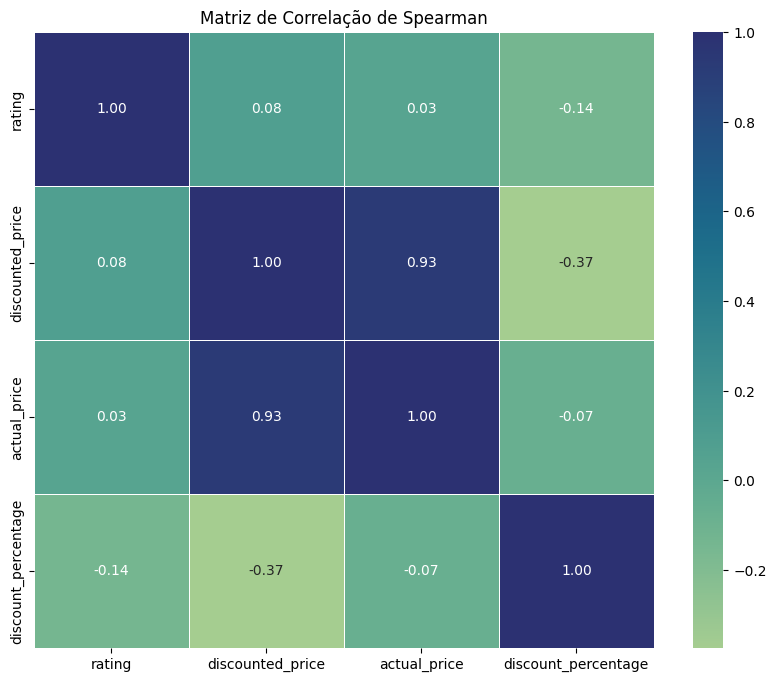

In [70]:
# gráfico da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='crest', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação de Spearman')
plt.show()


# **Testes de Hipóteses**

## **Pergunta 1 - Produtos com maior desconto tendem a receber melhores avaliações?**

**Regressão Linear**


---



➡️ Relação entre a porcentagem de desconto e a avaliação dos produtos, com uma linha de regressão vermelha indicando a tendência geral dessa relação.

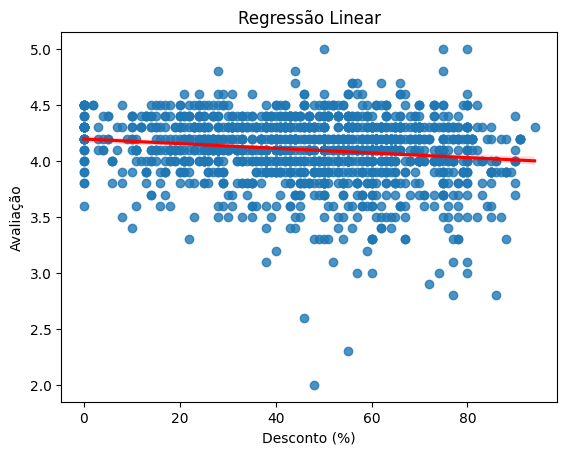

In [71]:
sns.regplot(x='discount_percentage', y='rating', data=review_product, line_kws={'color': 'red'})
plt.title('Regressão Linear')
plt.xlabel('Desconto (%)')
plt.ylabel('Avaliação')
plt.show()

**Correlação**


---



In [72]:
# Correlação de Pearson
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Handle potential infinite or missing values
review_product_clean = review_product.replace([np.inf, -np.inf], np.nan).dropna(subset=['discount_percentage', 'rating'])

# Calculate Pearson correlation on the cleaned data
pearsons_corr, pearsons_p_value = stats.pearsonr(review_product_clean['discount_percentage'], review_product_clean['rating'])

print(f"Correlação de Pearson: {pearsons_corr:.2f}")
print(f"P-value: {pearsons_p_value:.2f}")

Correlação de Pearson: -0.15
P-value: 0.00


📍 Não há uma forte relação linear entre a porcentagem de desconto e a avaliação dos produtos.

**Informações sobre as avaliações de produtos com altos descontos e baixos descontos**


---



In [73]:
# Definir um critério para altos e baixos descontos
threshold = 50
high_discount = review_product[review_product['discount_percentage'] > threshold]['rating']
low_discount = review_product[review_product['discount_percentage'] <= threshold]['rating']

In [74]:
high_discount.describe()

,rating
count,686.000000
mean,4.063557
std,0.313233
min,2.300000
25%,3.900000
50%,4.100000
75%,4.300000
max,5.000000


In [75]:
low_discount.describe()

,rating
count,769.000000
mean,4.127048
std,0.268623
min,2.000000
25%,4.000000
50%,4.200000
75%,4.300000
max,5.000000


**Teste de normalidade**


---



In [76]:
# Definindo significância
significancia = 0.05

# Lista de variáveis e seus nomes
variaveis = [("high_discount", high_discount), ("low_discount", low_discount)]

# Lista para armazenar os resultados
resultados = []

# Loop sobre os testes
for nome_variavel, variavel in variaveis:
    # Realiza o teste de normalidade para a categoria atual
    test_stat, p_value = normaltest(variavel)

    # Determina se há diferença significativa
    if p_value <= significancia:
        diferenca_significativa = 'Não é normal'
    else:
        diferenca_significativa = 'É normal'

    # Salvando os resultados
    resultados.append([nome_variavel, test_stat, p_value, diferenca_significativa])

# Criando DataFrame com os resultados
df_results = pd.DataFrame(resultados, columns=['Categoria', 'Teste de Normalidade', 'P-valor', 'É normal?'])

# Imprimindo os resultados formatados
print(tabulate(df_results, headers='keys', tablefmt='grid', showindex=False))

+---------------+------------------------+-------------+--------------+
| Categoria     |   Teste de Normalidade |     P-valor | É normal?    |
+===============+========================+=============+==============+
| high_discount |                147.653 | 8.66052e-33 | Não é normal |
+---------------+------------------------+-------------+--------------+
| low_discount  |                255.489 | 3.32132e-56 | Não é normal |
+---------------+------------------------+-------------+--------------+


**Mann-Whitney**


---



In [77]:
# Definindo significância
significancia = 0.05

# Realizando o teste de Mann-Whitney
test_stat, p_value = mannwhitneyu(high_discount, low_discount)

# Determina se há diferença significativa
if p_value <= significancia:
    diferenca_significativa = 'Há diferença significativa'
else:
    diferenca_significativa = 'Não há diferença significativa'

# Salvando os resultados
resultados = [['high_discount vs low_discount', test_stat, p_value, diferenca_significativa]]

# Criando DataFrame com os resultados
df_results = pd.DataFrame(resultados, columns=['Comparação', 'Estatística do Teste', 'P-valor', 'Diferença Significativa'])

# Imprimindo os resultados formatados
print(tabulate(df_results, headers='keys', tablefmt='grid', showindex=False))

+-------------------------------+------------------------+-------------+----------------------------+
| Comparação                    |   Estatística do Teste |     P-valor | Diferença Significativa    |
+===============================+========================+=============+============================+
| high_discount vs low_discount |                 232752 | 9.32782e-05 | Há diferença significativa |
+-------------------------------+------------------------+-------------+----------------------------+


📍 P-valor deu < 0.05, então há uma diferença significativa nas médias das avaliações entre produtos com altos e baixos descontos.

📍 Para determinar se produtos com maiores descontos recebem melhores avaliações, podemos comparar as médias das duas amostras:

In [78]:
#comparando as médias
mean_high_discount = high_discount.mean().round(2)
mean_low_discount = low_discount.mean().round(2)

print(f'Média de avaliações para altos descontos: {mean_high_discount}')
print(f'Média de avaliações para baixos descontos: {mean_low_discount}')

Média de avaliações para altos descontos: 4.06
Média de avaliações para baixos descontos: 4.13


📍 Essas médias sugerem que, em média, os produtos com baixos descontos têm uma avaliação ligeiramente melhor do que os produtos com altos descontos.

## **Pergunta 2 - Produtos mais caros tendem a receber uma melhor avaliação?**

**Regressão Linear**


---



➡️ Visualizar e analisar a relação entre o preço do produto com desconto e a avaliação dos produtos

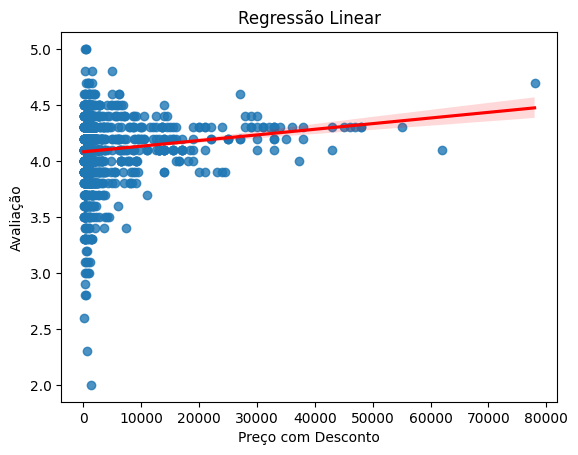

In [79]:
sns.regplot(x='discounted_price', y='rating', data=review_product, line_kws={'color': 'red'})
plt.title('Regressão Linear')
plt.xlabel('Preço com Desconto')
plt.ylabel('Avaliação')
plt.show()

**Correlação**



---



In [80]:
# Lidar com potenciais valores infinitos ou ausentes
import numpy as np
review_product['discounted_price'] = np.nan_to_num(review_product['discounted_price'])
review_product['rating'] = np.nan_to_num(review_product['rating'])

# Calculando correlação de Pearson
import scipy.stats as stats
r_pearson, p_value = stats.pearsonr(review_product['discounted_price'], review_product['rating'])
print(f"R-Pearson: {r_pearson:.4f}")

R-Pearson: 0.1206


📍 Fraca relação positiva entre o preço do produto com desconto e a avaliação dos produtos.

**Informações sobre as avaliações de produtos com altos preços e baixos preços**


---



In [81]:
# Definir um critério para avaliações altas e baixas
threshold_rating = review_product['rating'].median()  # Usar a mediana como ponto de corte
high_ratings = review_product[review_product['rating'] > threshold_rating]['actual_price']
low_ratings = review_product[review_product['rating'] <= threshold_rating]['actual_price']

In [82]:
high_ratings.describe()

,actual_price
count,683.000000
mean,6904.609078
std,13682.519251
min,50.000000
25%,868.000000
50%,1699.000000
75%,4999.000000
max,139900.000000


In [83]:
low_ratings.describe()

,actual_price
count,772.000000
mean,4171.879896
std,7439.555357
min,39.000000
25%,799.000000
50%,1599.000000
75%,3999.000000
max,69999.000000


**Shapiro-Wilk**


---



➡️ Verificar se existe diferença significativa entre as médias ou medianas.

In [84]:
# Realizar o teste de normalidade (Shapiro-Wilk)
shapiro_high = shapiro(high_ratings.dropna())
shapiro_low = shapiro(low_ratings.dropna())

print(f'Teste de Shapiro-Wilk para avaliações altas: Estatística={shapiro_high.statistic}, p-valor={shapiro_high.pvalue}')
print(f'Teste de Shapiro-Wilk para avaliações baixas: Estatística={shapiro_low.statistic}, p-valor={shapiro_low.pvalue}')

# Verificar normalidade
normal_high = shapiro_high.pvalue > 0.05
normal_low = shapiro_low.pvalue > 0.05

Teste de Shapiro-Wilk para avaliações altas: Estatística=0.5130426713417826, p-valor=1.3829170996165635e-39
Teste de Shapiro-Wilk para avaliações baixas: Estatística=0.5081537254953664, p-valor=1.0407788302101709e-41


In [85]:
if normal_high and normal_low:
    # Realizar o teste t de Student
    t_stat, p_value = ttest_ind(high_ratings.dropna(), low_ratings.dropna())
    print(f'Teste t de Student: T-statistic={t_stat}, p-value={p_value}')
else:
    # Realizar o teste de Mann-Whitney U
    u_stat, p_value = mannwhitneyu(high_ratings.dropna(), low_ratings.dropna())
    print(f'Teste de Mann-Whitney U: U-statistic={u_stat}, p-value={p_value}')

Teste de Mann-Whitney U: U-statistic=276969.5, p-value=0.09544628617729782


📍 A análise de correlação revelou um coeficiente de Pearson de 0.12, indicando uma relação positiva fraca, o que contraria nossa hipótese inicial. Além disso, o teste de Mann-Whitney demonstrou que não há diferença significativa entre os preços dos produtos que receberam avaliações altas e baixas. Isso refuta nossa hipótese inicial de que produtos mais caros teriam melhores avaliações.

## **Pergunta 3 - Quanto maior o número de pessoas que avaliaram o produto, melhor será a classificação?**

**Total de pessoas que avaliaram cada produto**


---



In [86]:
# Quantidade de pessoas que avaliaram cada produto
review_count = review_product.groupby('product_id').agg(review_count=('review_id', 'count'), rating_mean=('rating','mean')).reset_index()
review_count

,product_id,review_count,rating_mean
0,B002PD61Y4,2,4.1
1,B002SZEOLG,1,4.2
2,B003B00484,1,4.3
3,B003L62T7W,1,4.3
4,B004IO5BMQ,1,4.5
...,...,...,...
1345,B0BPCJM7TB,1,4.0
1346,B0BPJBTB3F,1,2.0
1347,B0BQ3K23Y1,1,4.8
1348,B0BQRJ3C47,1,5.0


**Correlação**


---



In [87]:
# Correlação de pearson
r_pearson, p_value = stats.pearsonr(review_count['review_count'], review_count['rating_mean'])
print(f"R-Pearson: {r_pearson:.4f}")
print(f"P-value: {p_value:.4f}")

R-Pearson: 0.0521
P-value: 0.0558


📍 O resultado mostra que não existe uma correlação entre número de pessoas que avaliaram um produto e o produto receber uma melhor avaliação.

**Regressão Linear**


---



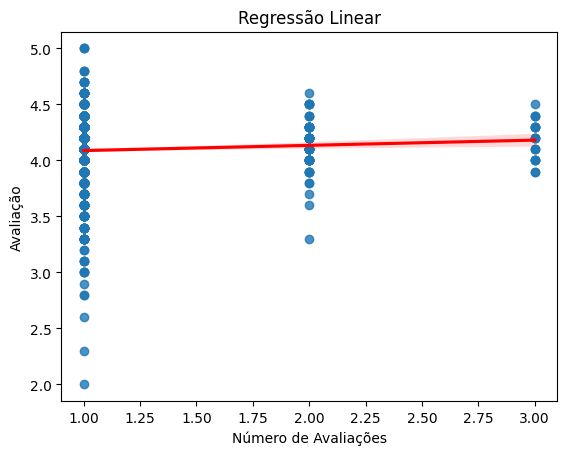

In [88]:
sns.regplot(x='review_count', y='rating_mean', data=review_count, line_kws={'color': 'red'})
plt.title('Regressão Linear')
plt.xlabel('Número de Avaliações')
plt.ylabel('Avaliação')
plt.show()

📍 Analisamos a relação entre o número de pessoas que avaliaram um produto e a sua classificação média. A análise de correlação mostrou 0.004137, indicando uma fraca relação positiva. Esse resultado sugere que não há evidências de que quanto maior o número de pessoas que avaliaram o produto, melhor será a classificação, refutando a nossa hipótese inicial.

## **Pergunta 4 - Quais categorias de produtos possuem melhores avaliações e mais compras? Quais são as categorias mais bem avaliadas?**

➡️ Nessa sessão, iremos dividir primeiramente, a seção category, pois ela possui as subcategorias agrupadas em uma mesma coluna. O objetivo é eliminar as subcategorias dessa coluna e deixar somente os valores das categorias.

In [89]:
# Separarando e deixando somente a primeira palavra da variável category
review_product['category'] = review_product['category'].str.split("|").str[0]

# Mostrar somente a coluna category
print(review_product['category'])

0                 Electronics
1                Home&Kitchen
2                 Electronics
3                 Electronics
4                 Electronics
                ...          
1459              Electronics
1460    Computers&Accessories
1461    Computers&Accessories
1462    Computers&Accessories
1463              Electronics
Name: category, Length: 1464, dtype: object


In [90]:
# Agrupar os dados da variável category
review_product_category = review_product.groupby('category').agg(rating_mean=('rating', 'mean'), rating_median=('rating', 'median'), review_id=('review_id', 'count')).reset_index()
review_product_category['rating_mean'] = review_product_category['rating_mean'].round(2)
review_product_category

# Colocando em ordem crescente de média
review_product_category_sorted = review_product_category.sort_values(by='rating_mean', ascending=False)
review_product_category_sorted

,category,rating_mean,rating_median,review_id
7,OfficeProducts,4.31,4.30,31
8,Toys&Games,4.30,4.30,1
5,HomeImprovement,4.25,4.25,2
1,Computers&Accessories,4.16,4.20,450
2,Electronics,4.08,4.10,520
4,Home&Kitchen,4.04,4.10,447
3,Health&PersonalCare,4.00,4.00,1
6,MusicalInstruments,3.90,3.90,2
0,Car&Motorbike,3.80,3.80,1


## **Testes de Hipóteses**

Nessa sesção, iremos fazer o teste de hipótese para entender se existe diferença significativa entre as medianas das diferentes categorias.

Algumas categorias acima apresentam valores muito reduzidos de avaliações (COMPUTERS&ACCESSORIES, HEALTH&PERSONALCARE, HOMEIMPROVEMENT, MUSICALINSTRUMENTS e TOYS&GAMES), por isso, essas variáveis não serão consideradas na análise.

**Teste de Normalidade**


---



In [91]:
significancia = 0.05

# Lista de variáveis
variaveis = ['Computers&Accessories', 'Electronics', 'Home&Kitchen', 'OfficeProducts']

# Lista para armazenar os resultados
resultados = []

# Loop sobre os testes
for variavel in variaveis:
    # Filtrando o DataFrame para a categoria atual
    categoria_df = review_product[review_product['category'] == variavel]

    # Verificando se há dados suficientes para o teste
    if len(categoria_df) < 8:
        print(f"Não há dados suficientes para a categoria {variavel}. Pulando teste.")
        resultados.append([variavel, 'N/A', 'N/A', 'N/A'])
        continue  # Pula para a próxima categoria

    # Realiza o teste de normalidade para a categoria atual
    test_stat, p_value = normaltest(categoria_df['rating'])

    # Determina se há diferença significativa
    if p_value <= significancia:
        diferenca_significativa = 'Não é normal'
    else:
        diferenca_significativa = 'É normal'

    # Salvando os resultados
    resultados.append([variavel, test_stat, p_value, diferenca_significativa])

# Criando DataFrame com os resultados
normalization_results = pd.DataFrame(resultados, columns=['Categoria', 'Teste de Normalidade', 'P-valor', 'É normal?'])

# Imprimindo os resultados formatados
print(tabulate(normalization_results, headers='keys', tablefmt='grid', showindex=False))

+-----------------------+------------------------+-------------+--------------+
| Categoria             |   Teste de Normalidade |     P-valor | É normal?    |
+=======================+========================+=============+==============+
| Computers&Accessories |               62.6663  | 2.46704e-14 | Não é normal |
+-----------------------+------------------------+-------------+--------------+
| Electronics           |               90.8566  | 1.86527e-20 | Não é normal |
+-----------------------+------------------------+-------------+--------------+
| Home&Kitchen          |              155.803   | 1.47158e-34 | Não é normal |
+-----------------------+------------------------+-------------+--------------+
| OfficeProducts        |                2.93464 | 0.230542    | É normal     |
+-----------------------+------------------------+-------------+--------------+


**Teste de Kruskal-Wallis**


---



Como o teste de normalidade mostrou que os dados para cada categoria apresentam disteibuição não normal. Vamos utilizar o teste de Kruskal-Wallis.

O teste de Kruskal-Wallis avalia se diferentes amostras apresentam diferença significativa entre si. É uma alternativa à ANOVA quando as variáveis ​​não são normalmente distribuídas.

In [92]:
# Lista de categorias a serem comparadas
categorias = ['Computers&Accessories', 'Electronics', 'Home&Kitchen', 'OfficeProducts']

# Lista para armazenar as avaliações de cada categoria
ratings_por_categoria = []

for categoria in categorias:
    ratings_por_categoria.append(review_product[review_product['category'] == categoria]['rating'])

# Executando o teste de Kruskal-Wallis
statistic, p_value = kruskal(*ratings_por_categoria)

# Imprimindo os resultados
print(f'Estatística do teste de Kruskal-Wallis: {statistic}')
print(f'Valor-p: {p_value}')

# Verificando o resultado com um nível de significância de 0.05
significancia = 0.05
if p_value < significancia:
    print('Rejeitamos a hipótese nula. Pelo menos uma das medianas é diferente.')
else:
    print('Aceitamos a hipótese nula. As medianas são iguais entre as categorias.')

Estatística do teste de Kruskal-Wallis: 62.597232447363574
Valor-p: 1.637495603210564e-13
Rejeitamos a hipótese nula. Pelo menos uma das medianas é diferente.


**Mann-Whitney**


---



Foi verificado que pelo menos uma das medianas é diferente, por isso, vamos utilizar o teste de Mann-Whitney para identificar quais categorias apresentam diferenças significativas nas medianas das avaliações.

Além do fato das amostras serem não normais, elas são não pareadas, por isso, estamos utilizando o teste de Mann-Whitney.

+-----------------------+----------------+----------------------------+-------------+----------------------------------------------+
| Categoria 1           | Categoria 2    |   Estatística Mann-Whitney |     Valor-p | Diferença Significativa                      |
+=======================+================+============================+=============+==============================================+
| Computers&Accessories | Electronics    |                   136435   | 6.58537e-06 | Há diferença significativa entre as medianas |
+-----------------------+----------------+----------------------------+-------------+----------------------------------------------+
| Computers&Accessories | Home&Kitchen   |                   123738   | 1.79984e-09 | Há diferença significativa entre as medianas |
+-----------------------+----------------+----------------------------+-------------+----------------------------------------------+
| Computers&Accessories | OfficeProducts |                     4316.5

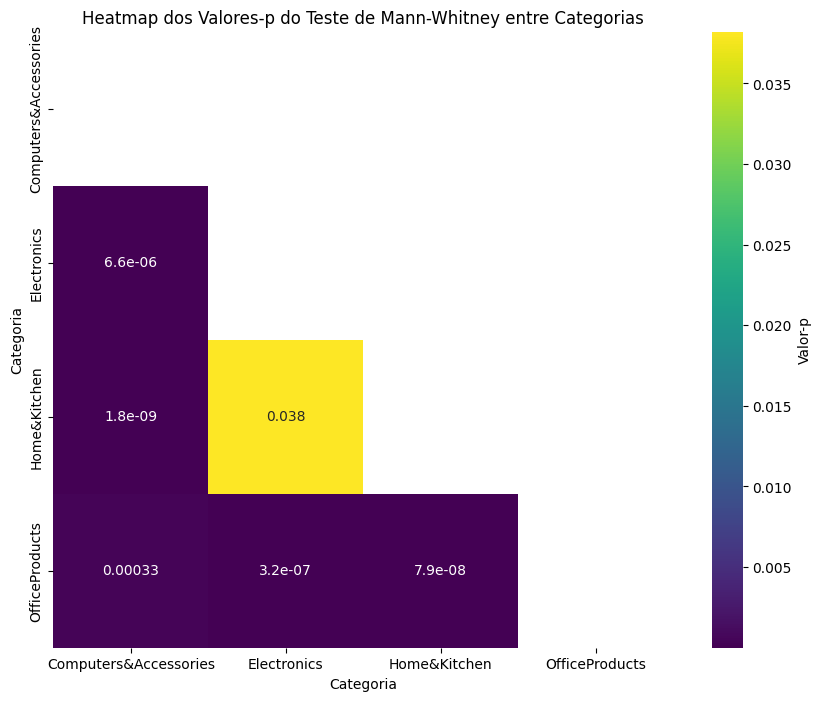

In [93]:
# Lista de categorias a serem comparadas
categorias = ['Computers&Accessories', 'Electronics', 'Home&Kitchen', 'OfficeProducts']

# Lista para armazenar as avaliações de cada categoria
ratings_por_categoria = [review_product[review_product['category'] == categoria]['rating'] for categoria in categorias]

# Lista para armazenar os resultados
resultados = []

# Matriz para armazenar os valores-p
matriz_valor_p = np.zeros((len(categorias), len(categorias)))

# Realizando o teste para cada par de categorias:
for i in range(len(categorias)):
    for j in range(i + 1, len(categorias)):
        # Comparação entre as categorias i e j
        categoria1 = categorias[i]
        categoria2 = categorias[j]
        avaliacoes_categoria1 = ratings_por_categoria[i]
        avaliacoes_categoria2 = ratings_por_categoria[j]

        # Realizando o Teste Mann-Whitney
        estatisticas_mann, p_valor_mann = mannwhitneyu(avaliacoes_categoria1, avaliacoes_categoria2)

        # Verificando significância estatística (opcional):
        significancia = 0.05
        if p_valor_mann < significancia:
            diferenca_significativa = 'Há diferença significativa entre as medianas'
        else:
            diferenca_significativa = 'Não apresentam diferença significativa entre as medianas'

        # Salvando os resultados
        resultados.append([categoria1, categoria2, estatisticas_mann, p_valor_mann, diferenca_significativa])

        # Preenchendo a matriz com os valores-p
        matriz_valor_p[i, j] = p_valor_mann
        matriz_valor_p[j, i] = p_valor_mann  # A matriz é simétrica

# Criando o dataframe com os resultados
df_results = pd.DataFrame(resultados, columns=['Categoria 1', 'Categoria 2', 'Estatística Mann-Whitney', 'Valor-p', 'Diferença Significativa'])

# Imprimindo os resultados formatados em uma tabela
print(tabulate(df_results, headers='keys', tablefmt='grid', showindex=False))

# Criando uma máscara para esconder a parte superior do heatmap
mask = np.triu(np.ones_like(matriz_valor_p, dtype=bool))  # Cria uma máscara triangular superior

# Criando um heatmap dos valores-p
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_valor_p, annot=True, xticklabels=categorias, yticklabels=categorias, cmap='viridis', cbar_kws={'label': 'Valor-p'}, mask=mask)
plt.title('Heatmap dos Valores-p do Teste de Mann-Whitney entre Categorias')
plt.xlabel('Categoria')
plt.ylabel('Categoria')
plt.show()

## **Gráficos**

**Distribuição das Avaliações por Categoria**


---



<ipython-input-94-d1961f11d47e>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




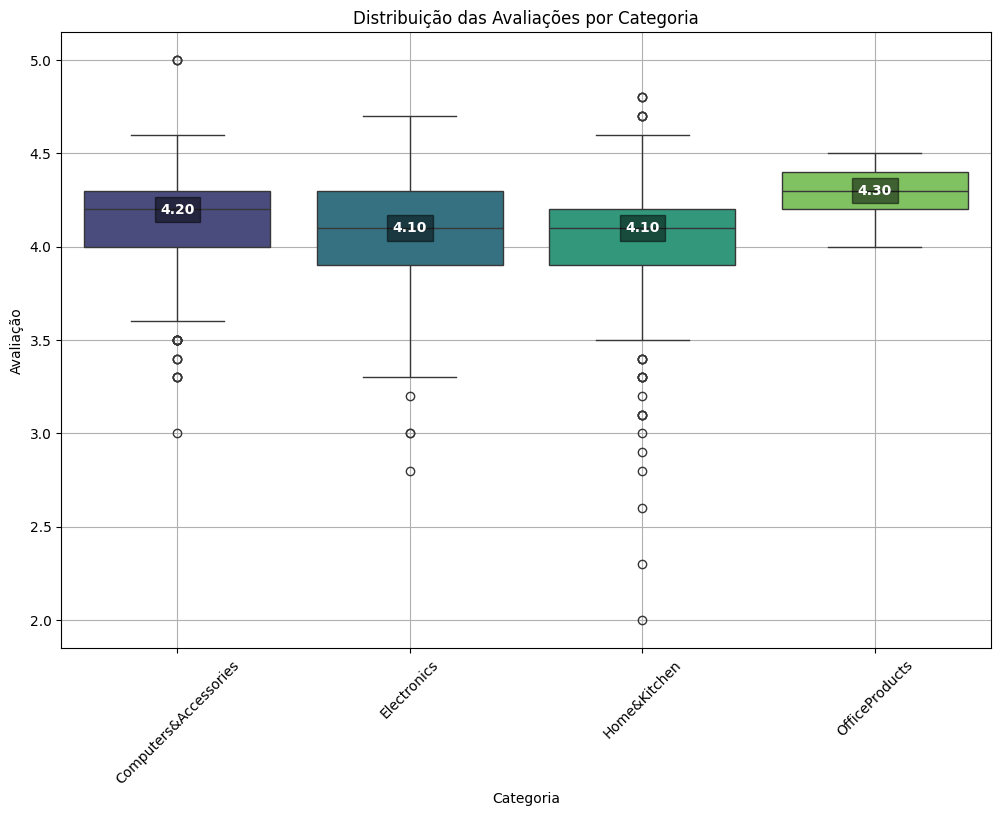

In [94]:
# Lista de categorias a serem comparadas
categorias = ['Computers&Accessories', 'Electronics', 'Home&Kitchen', 'OfficeProducts']

# Preparando os dados para o box plot
data = []
medianas = []
for categoria, ratings in zip(categorias, ratings_por_categoria):
    data.append(pd.DataFrame({'Categoria': categoria, 'Avaliação': ratings}))
    medianas.append(ratings.median())

df_boxplot = pd.concat(data)

# Criando o box plot com seaborn
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Categoria', y='Avaliação', data=df_boxplot, palette='viridis')

# Adicionando as medianas ao gráfico
for i, mediana in enumerate(medianas):
    ax.text(i, mediana, f'{mediana:.2f}', ha='center', va='center', fontweight='bold', color='white', bbox=dict(facecolor='black', alpha=0.5))

plt.title('Distribuição das Avaliações por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Avaliação')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Análise das medianas das avaliações**


---



O teste estatístico mostrou que existe diferença significativa entre as medianas, então agora podemos avaliar qual categoria se destaca tendo uma mediana maior.

In [95]:
# agrupando os dados da variável category
review_product_category = review_product.groupby('category').agg(rating_mean=('rating', 'mean'), rating_median=('rating', 'median'), review_id=('review_id', 'count')).reset_index()
review_product_category['rating_mean'] = review_product_category['rating_mean'].round(2)
review_product_category

,category,rating_mean,rating_median,review_id
0,Car&Motorbike,3.80,3.80,1
1,Computers&Accessories,4.16,4.20,450
2,Electronics,4.08,4.10,520
3,Health&PersonalCare,4.00,4.00,1
4,Home&Kitchen,4.04,4.10,447
5,HomeImprovement,4.25,4.25,2
6,MusicalInstruments,3.90,3.90,2
7,OfficeProducts,4.31,4.30,31
8,Toys&Games,4.30,4.30,1


Dentre as categorias acima, a que apresenta uma maior mediana foi a Office Products e Toys&Games. Porém, a categoria Toys&Games	apresenta somente uma avaliação, então podemos cocluir que **a categoria que apresenta uma maior mediana é a Office Products.**

**Gráfico da avaliação média por categoria**


---



<ipython-input-96-4bbc2f16c135>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-96-4bbc2f16c135>:20: UserWarning:

FixedFormatter should only be used together with FixedLocator



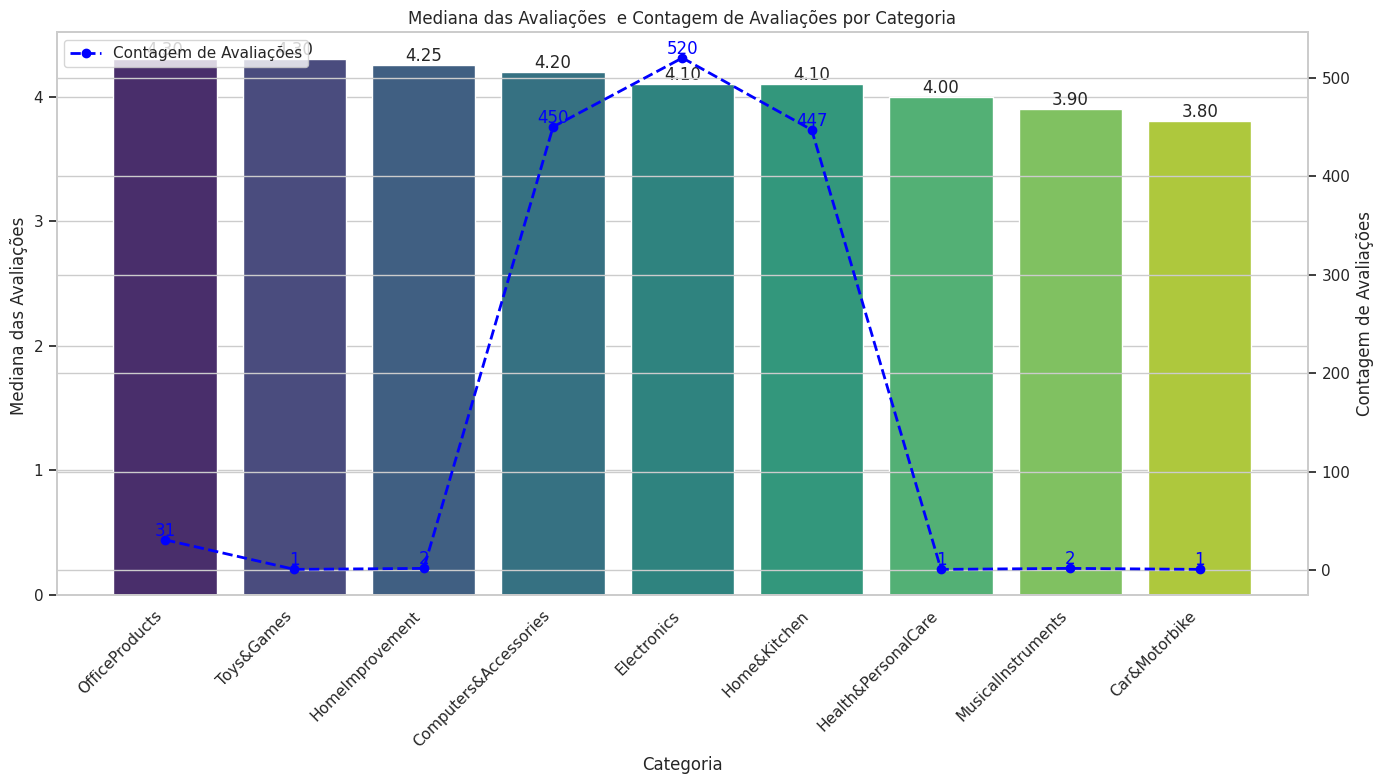

In [96]:
review_product_category = review_product.groupby('category').agg({'rating': 'median', 'review_id': 'count'}).reset_index()
review_product_category = review_product_category.rename(columns={'rating': 'rating_median', 'review_id': 'review_count'})

# Ordenar o DataFrame por 'rating_median' para o gráfico
review_product_category_sorted = review_product_category.sort_values(by='rating_median', ascending=False)

# Configuração do estilo dos gráficos
sns.set(style="whitegrid")

# Definir o tamanho da figura
fig, ax1 = plt.subplots(figsize=(14, 8))

# Criar as barras para rating_median
sns.barplot(x='category', y='rating_median', data=review_product_category_sorted, ax=ax1, palette='viridis')

# Adicionar títulos e rótulos de eixos para o primeiro eixo y
ax1.set_xlabel('Categoria')
ax1.set_ylabel('Mediana das Avaliações ')
ax1.set_title('Mediana das Avaliações  e Contagem de Avaliações por Categoria')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Mostrar os valores das barras para rating_median
for index, value in enumerate(review_product_category_sorted['rating_median']):
    ax1.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Criar um segundo eixo y para review_count
ax2 = ax1.twinx()
ax2.set_ylabel('Contagem de Avaliações')

# Adicionar os pontos para review_count
ax2.plot(ax1.get_xticks(), review_product_category_sorted['review_count'], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6, label='Contagem de Avaliações')

# Mostrar os valores dos pontos para review_count
for index, value in enumerate(review_product_category_sorted['review_count']):
    ax2.text(index, value, f'{value}', ha='center', va='bottom', color='blue')

# Adicionar a legenda para o segundo eixo y
ax2.legend(loc='upper left')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

Ao analisar as medianas e a quantidade de avaliações é possível verificar que existe três categorias de produtos que apresentam um maior número de avaliações. São essas:

* Computers&Accessories
* Electronics
* Home&Kitchen

Dessas três categorias, a **Computers&Accessories** apresenta maior mediana de avaliaçõe (4.20).

## **Segmentação - Avaliação das avaliações altas por categoria**

O código a seguir, segmenta os dados em avaliações (rating) altas e baixas e faz a contabilização de avaliações altas por categoria para verificar qual categoria teve mais avaliações altas.

A segmentação foi feita por quartis, as avaliações a partir do quartil 3 foram consideradas altas.

Os resultados estão em porcentagem, pois cada categoria apresenta valores diferentes quantidades de avaliações, tendo categorias como COMPUTERS&ACCESSORIES, HEALTH&PERSONALCARE, HOMEIMPROVEMENT, MUSICALINSTRUMENTS e TOYS&GAMES que apresentam somente uma ou duas avaliações.

In [97]:
# Contagem de produtos com avaliações altas por categoria de produto

def separar_e_contabilizar_avaliacoes_altas(review_product):
    """
    Separa as avaliações "altas" (quartil 3 para cima) e conta quantas avaliações "altas" cada categoria teve.

    Argumentos:
        review_product (DataFrame): O DataFrame com os dados.

    Retorna:
        DataFrame: Um DataFrame com a contagem de avaliações "altas" por categoria.
    """
    categorias = review_product['category'].unique()
    contagem_avaliacoes_altas = []

    for categoria in categorias:
        dados_categoria = review_product[review_product['category'] == categoria].copy()
        q3 = dados_categoria['rating'].quantile(0.75)

        # Marcar as avaliações "altas"
        dados_categoria.loc[:,'avaliacao_alta'] = np.where(dados_categoria['rating'] >= q3, 1, 0)

        # Contar quantas avaliações "altas" a categoria teve
        contagem_alta = dados_categoria['avaliacao_alta'].sum()

        contagem_avaliacoes_altas.append({
            'category': categoria,
            'quantidade_avaliacoes_altas': contagem_alta
        })

    # Converter a lista de contagem para um DataFrame
    df_contagem_avaliacoes_altas = pd.DataFrame(contagem_avaliacoes_altas)

    return df_contagem_avaliacoes_altas

# Exemplo de uso
df_contagem_avaliacoes_altas = separar_e_contabilizar_avaliacoes_altas(review_product.copy())

#Em ordem decrescente
df_contagem_avaliacoes_altas = df_contagem_avaliacoes_altas.sort_values(by='quantidade_avaliacoes_altas', ascending=False)
df_contagem_avaliacoes_altas

,category,quantidade_avaliacoes_altas
2,Computers&Accessories,182
1,Home&Kitchen,169
0,Electronics,144
3,OfficeProducts,13
4,Toys&Games,1
5,HomeImprovement,1
7,Health&PersonalCare,1
8,Car&Motorbike,1
9,MusicalInstruments,1
6,NaN,0


**Normalizando:**

In [98]:
def separar_e_normalizar_avaliacoes_altas(review_product):
    """
    Separa as avaliações "altas" (quartil 3 para cima) e calcula a proporção de avaliações "altas" para cada categoria.

    Argumentos:
        review_product (DataFrame): O DataFrame com os dados.

    Retorna:
        DataFrame: Um DataFrame com a proporção de avaliações "altas" por categoria.
    """
    categorias = review_product['category'].unique()
    proporcao_avaliacoes_altas = []

    for categoria in categorias:
        dados_categoria = review_product[review_product['category'] == categoria].copy()
        q3 = dados_categoria['rating'].quantile(0.75)

        # Marcar as avaliações "altas"
        dados_categoria.loc[:, 'avaliacao_alta'] = np.where(dados_categoria['rating'] >= q3, 1, 0)

        # Contar quantas avaliações "altas" a categoria teve
        contagem_alta = dados_categoria['avaliacao_alta'].sum()

        # Total de avaliações na categoria
        total_avaliacoes = dados_categoria.shape[0]

        # Calcular a proporção de avaliações "altas"
        proporcao_alta = round((contagem_alta / total_avaliacoes)*100, 1)

        proporcao_avaliacoes_altas.append({
            'category': categoria,
            'proporcao_avaliacoes_altas': proporcao_alta,
            'quantidade_avaliacoes_altas': contagem_alta,
            'total_avaliacoes': total_avaliacoes
        })

    # Converter a lista de proporções para um DataFrame
    df_proporcao_avaliacoes_altas = pd.DataFrame(proporcao_avaliacoes_altas)

    return df_proporcao_avaliacoes_altas

# Exemplo de uso
df_proporcao_avaliacoes_altas = separar_e_normalizar_avaliacoes_altas(review_product.copy())

# Colocar em ordem decrescente
df_proporcao_avaliacoes_altas = df_proporcao_avaliacoes_altas.sort_values(by='quantidade_avaliacoes_altas', ascending=False)
df_proporcao_avaliacoes_altas

<ipython-input-98-365a52e9d5f0>:28: RuntimeWarning:

invalid value encountered in scalar divide



,category,proporcao_avaliacoes_altas,quantidade_avaliacoes_altas,total_avaliacoes
2,Computers&Accessories,40.4,182,450
1,Home&Kitchen,37.8,169,447
0,Electronics,27.7,144,520
3,OfficeProducts,41.9,13,31
4,Toys&Games,100.0,1,1
5,HomeImprovement,50.0,1,2
7,Health&PersonalCare,100.0,1,1
8,Car&Motorbike,100.0,1,1
9,MusicalInstruments,50.0,1,2
6,NaN,NaN,0,0


**Gráfico da quantidade de avaliações altas**

<ipython-input-99-dd45f2a42496>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-99-dd45f2a42496>:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



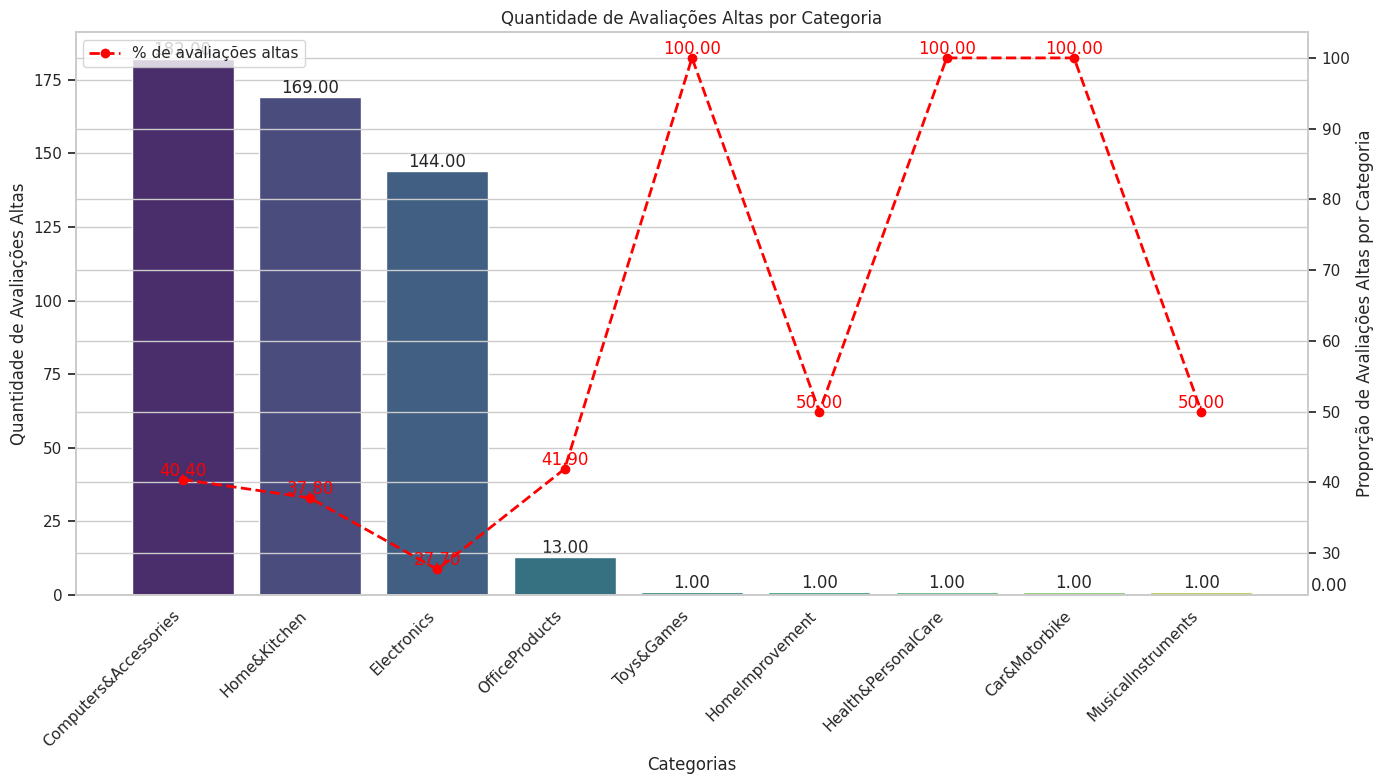

In [99]:
# Configuração do estilo dos gráficos
sns.set(style="whitegrid")

# Definir o tamanho da figura
fig, ax1 = plt.subplots(figsize=(14, 8))

# Criar as barras para quantidade_avaliacoes_altas
sns.barplot(x='category', y='quantidade_avaliacoes_altas', data=df_proporcao_avaliacoes_altas, ax=ax1, palette='viridis')

# Adicionar títulos e rótulos de eixos para o primeiro eixo y
ax1.set_xlabel('Categorias')
ax1.set_ylabel('Quantidade de Avaliações Altas')
ax1.set_title('Quantidade de Avaliações Altas por Categoria')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Mostrar os valores das barras para quantidade_avaliacoes_altas
for index, value in enumerate(df_proporcao_avaliacoes_altas['quantidade_avaliacoes_altas']):
    ax1.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Criar um segundo eixo y para proporcao_avaliacoes_altas
ax2 = ax1.twinx()
ax2.set_ylabel('Proporção de Avaliações Altas por Categoria')

# Adicionar os pontos para proporcao_avaliacoes_altas
ax2.plot(range(len(df_proporcao_avaliacoes_altas['category'])), df_proporcao_avaliacoes_altas['proporcao_avaliacoes_altas'], color='red', marker='o', linestyle='dashed', linewidth=2, markersize=6, label='% de avaliações altas')

# Mostrar os valores dos pontos para proporcao_avaliacoes_altas
for index, value in enumerate(df_proporcao_avaliacoes_altas['proporcao_avaliacoes_altas']):
    ax2.text(index, value, f'{value:.2f}', ha='center', va='bottom', color='red')

# Adicionar a legenda para o segundo eixo y
ax2.legend(loc='upper left')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

**Através da análise do gráfico acima obtido nessa seção, é possível verificar que das três categorias com mais avaliações (*Computers&Accessories,  Electronics, Home&Kitchen*) a que apresentou uma maior porcentagem de avaliações altas foi a Computers&Accessories.**

# **Análise das Avaliações - NLP**



---



Estamos utilizando a Processamento de Linguagem Natural (NLP) para analisar sentimentos dos usuários, com o objetivo de compreender as emoções dos clientes em suas compras online.

Esta análise de sentimentos nos permite extrair informações sobre a percepção do público em relação a um determinado item ao entender quais são as palavras mais associadas aos produtos e a frequência que ela ocorre.




# **Títulos**


Nessa seção, iremos fazer a análise dos sentimentos, examinando o texto dos títulos das avaliações.




## **Tratamento de textos**

In [100]:
!pip install langdetect wordninja vaderSentiment
import pandas as pd
import re
import nltk
from langdetect import detect
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import wordninja
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.0 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=3cc56920bcc0c63a566fdf5b825f7cd47910869799cc565df84978d73af0c386
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541530 sha256=a520e0f5c12255bc727d5dcf7642d471f7802f56f03f3306f800d10372a6e41e
  Stored in directory: /root/.cache/pip/wheels/aa/44/3a/f2a5c1859b8b541ded969b4cd12d0a58897f12408f4f51e084
Successfully built langdetect wordninja


In [101]:
# Verificar se existem valores nulos na coluna review_title:

review_product['review_title'].isnull().sum()

0

In [102]:
# Substituir quebras de linha (\n e \r) da coluna review_title por espaços em uma lista de textos:

import re

def re_breakline(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """

    # Applying regex to replace newlines with spaces
    return [re.sub(r'[\n\r]', ' ', r) for r in text_list]

# Aplicando a função na coluna 'comment' do DataFrame df_comments
review_product['review_title'] = re_breakline(review_product['review_title'].tolist())

In [103]:
# Remover emojis:

# Função para remover emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # símbolos & pictogramas
                               u"\U0001F680-\U0001F6FF"  # transporte e símbolos de mapas
                               u"\U0001F1E0-\U0001F1FF"  # bandeiras (iOS)
                               u"\U00002500-\U00002BEF"  # caracteres chineses comuns
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # flags (iOS)
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Remover emojis:
review_product['review_title'] = review_product['review_title'].apply(lambda x: remove_emojis(str(x)))

In [104]:
# Remover todos os caracteres que não são alfanuméricos (\w) ou espaços em branco (\s):
review_product['review_title'] = review_product['review_title'].str.replace(r'[^\w\s]', '', regex=True)

In [105]:
# Converter os textos da coluna review_title para letras minúsculas:
review_product['review_title'] = review_product['review_title'].str.lower()

In [106]:
# Substituir links pela palavra link na coluna review_title:
review_product['review_title'] = review_product['review_title'].str.replace(r'http\S+', 'link', regex=True)

In [107]:
# Substituir datas pela palavra data na coluna review_title:
review_product['review_title'] = review_product['review_title'].str.replace(r'\d{4}-\d{2}-\d{2}', 'data', regex=True)

In [108]:
# Substituir símbolos monetários da coluna review_title por "monetary_value":
review_product['review_title'] = review_product['review_title'].str.replace(r'\$\d+', 'monetary_value', regex=True)

In [109]:
# Substituir valores numéricos da coluna review_title por "numeric_value":
review_product['review_title'] = review_product['review_title'].str.replace(r'\d+', 'numeric_value', regex=True)

In [110]:
# Substituir palavras de negação da coluna review_title por "negation":
review_product['review_title'] = review_product['review_title'].str.replace(r'\b(no|not|never)\b', 'negation', regex=True)

In [111]:
# Eliminar espaços em branco desnecessários da coluna review_title:
review_product['review_title'] = review_product['review_title'].str.strip()

In [112]:
# Remoção de espaços extras entre as palavras:
review_product['review_title'] = review_product['review_title'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))

In [113]:
# Substituir "productgood" por "product good" na coluna review_title:
review_product['review_title'] = review_product['review_title'].str.replace(r'productgood', 'product good', regex=True)

# Substituir "qualitygood" por "quality good" na coluna review_title:
review_product['review_title'] = review_product['review_title'].str.replace(r'qualitygood', 'quality good', regex=True)

In [114]:
!pip install langdetect

In [115]:
from langdetect import detect
import nltk

# Detectar o idioma de cada título
review_product['language'] = review_product['review_title'].apply(detect)

In [116]:
# Agrupar e contar por idioma:
language_counts = review_product.groupby('language').size().reset_index(name='count')
language_counts

,language,count
0,af,1
1,en,1458
2,et,1
3,fr,1
4,it,2
5,ro,1


In [117]:
# Usar apenas as linhas em que "language" é igual a "en":
review_product = review_product[review_product['language'] == 'en']

In [118]:
import spacy

# Carregar o modelo de linguagem do spaCy
nlp = spacy.load("en_core_web_sm")

# Função para filtrar palavras não inglesas
def filter_non_english_words(text):
    doc = nlp(text)
    # Lista de palavras comuns em inglês (usando vocabulário spaCy)
    common_english_words = set([token.text for token in nlp.vocab if token.is_alpha and token.is_lower])
    filtered_words = [token.text for token in doc if token.is_alpha and token.text.lower() in common_english_words]
    return " ".join(filtered_words)

# Aplicar a função para filtrar palavras não inglesas
review_product['review_title'] = review_product['review_title'].apply(filter_non_english_words)

review_product.head(3)

,user_id,product_id,review_id,review_title,review_content,img_link,product_link,rating,product_name,category,discounted_price,actual_price,discount_percentage,about_product,language
0,"AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZA...",B07ZR4S1G4,"RN7RYZ9MBIC42,R2N4UBCVLGVVTW,R2E80AM1QM7WZ3,R2...",excellent solution for sony tvsworth purchasev...,Sometimes its simple solutions that come to re...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Universal-Remote-Control...,4.4,Universal Remote Control for All Sony TV for A...,Electronics,239.0,699.0,66.0,"Replacement for Sony RM-YD092 ,Fits with vario...",en
1,"AE23RS3W7GZO7LHYKJU6KSKVM4MQ,AEQUNEY6GQOTEGUMS...",B00HVXS7WC,"R143O8SM7QE4W5,RQBZ31QLH40O,R3KZC4ST0RAK64,R2P...",just go for pin plug should be theremixer is g...,"Product is so good but packaging was so bad😠.,...",indisponível,indisponível,4.2,Bajaj Rex 500W Mixer Grinder with Nutri-Pro Fe...,Home&Kitchen,1999.0,3210.0,38.0,Wattage: 500 W; Voltage: 220-240V ; Revolution...,en
3,"AE27UOZENYSWCQVQRRUQIV2ZM7VA,AGMYSLV6NNOAYES25...",B09V2PZDX8,"R1BFOK13WV2QLM,R3H97FN1H50F7F,R1IY2IDRUJX5O5,R...",centre keynice phonegood for exam preparing st...,Phone is ok except middle button it’s a headac...,https://m.media-amazon.com/images/I/41w5fk8Vl6...,https://www.amazon.in/Nokia-105-Single-Keypad-...,4.0,"Nokia 105 Single SIM, Keypad Mobile Phone with...",Electronics,1299.0,1599.0,19.0,All-new redesigned Nokia mobile which is famil...,en


In [119]:
# Função para remover stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Aplicando a função remove_stopwords à coluna review_title
review_product['review_title'] = review_product['review_title'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [120]:
# Tokenização:

from nltk.tokenize import word_tokenize

# Baixar os recursos necessários para tokenização
#nltk.download('punkt')

# Definir uma função para tokenizar o texto
def tokenize_text(text):
    return word_tokenize(text)

# Aplicar a tokenização em cada título de avaliação
review_product['tokenized_title'] = review_product['review_title'].apply(tokenize_text)

# Exibir o DataFrame resultante
review_product.head(3)

,user_id,product_id,review_id,review_title,review_content,img_link,product_link,rating,product_name,category,discounted_price,actual_price,discount_percentage,about_product,language,tokenized_title
0,"AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZA...",B07ZR4S1G4,"RN7RYZ9MBIC42,R2N4UBCVLGVVTW,R2E80AM1QM7WZ3,R2...",excellent solution sony tvsworth purchasevery ...,Sometimes its simple solutions that come to re...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Universal-Remote-Control...,4.4,Universal Remote Control for All Sony TV for A...,Electronics,239.0,699.0,66.0,"Replacement for Sony RM-YD092 ,Fits with vario...",en,"[excellent, solution, sony, tvsworth, purchase..."
1,"AE23RS3W7GZO7LHYKJU6KSKVM4MQ,AEQUNEY6GQOTEGUMS...",B00HVXS7WC,"R143O8SM7QE4W5,RQBZ31QLH40O,R3KZC4ST0RAK64,R2P...",go pin plug theremixer good well jar goodbut p...,"Product is so good but packaging was so bad😠.,...",indisponível,indisponível,4.2,Bajaj Rex 500W Mixer Grinder with Nutri-Pro Fe...,Home&Kitchen,1999.0,3210.0,38.0,Wattage: 500 W; Voltage: 220-240V ; Revolution...,en,"[go, pin, plug, theremixer, good, well, jar, g..."
3,"AE27UOZENYSWCQVQRRUQIV2ZM7VA,AGMYSLV6NNOAYES25...",B09V2PZDX8,"R1BFOK13WV2QLM,R3H97FN1H50F7F,R1IY2IDRUJX5O5,R...",centre keynice phonegood exam preparing studen...,Phone is ok except middle button it’s a headac...,https://m.media-amazon.com/images/I/41w5fk8Vl6...,https://www.amazon.in/Nokia-105-Single-Keypad-...,4.0,"Nokia 105 Single SIM, Keypad Mobile Phone with...",Electronics,1299.0,1599.0,19.0,All-new redesigned Nokia mobile which is famil...,en,"[centre, keynice, phonegood, exam, preparing, ..."


In [121]:
# Lematização:

from nltk.stem import WordNetLemmatizer

# Baixar recursos necessários para lematização
nltk.download('wordnet')
nltk.download('omw-1.4')

# Definir a lematização
lemmatizer = WordNetLemmatizer()

# Definir uma função para lematizar tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Aplicar a função de lematização em cada lista de tokens
review_product['lemmatized_tokens'] = review_product['tokenized_title'].apply(lemmatize_tokens)

# Exibir o DataFrame resultante
review_product.head(3)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,user_id,product_id,review_id,review_title,review_content,img_link,product_link,rating,product_name,category,discounted_price,actual_price,discount_percentage,about_product,language,tokenized_title,lemmatized_tokens
0,"AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZA...",B07ZR4S1G4,"RN7RYZ9MBIC42,R2N4UBCVLGVVTW,R2E80AM1QM7WZ3,R2...",excellent solution sony tvsworth purchasevery ...,Sometimes its simple solutions that come to re...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Universal-Remote-Control...,4.4,Universal Remote Control for All Sony TV for A...,Electronics,239.0,699.0,66.0,"Replacement for Sony RM-YD092 ,Fits with vario...",en,"[excellent, solution, sony, tvsworth, purchase...","[excellent, solution, sony, tvsworth, purchase..."
1,"AE23RS3W7GZO7LHYKJU6KSKVM4MQ,AEQUNEY6GQOTEGUMS...",B00HVXS7WC,"R143O8SM7QE4W5,RQBZ31QLH40O,R3KZC4ST0RAK64,R2P...",go pin plug theremixer good well jar goodbut p...,"Product is so good but packaging was so bad😠.,...",indisponível,indisponível,4.2,Bajaj Rex 500W Mixer Grinder with Nutri-Pro Fe...,Home&Kitchen,1999.0,3210.0,38.0,Wattage: 500 W; Voltage: 220-240V ; Revolution...,en,"[go, pin, plug, theremixer, good, well, jar, g...","[go, pin, plug, theremixer, good, well, jar, g..."
3,"AE27UOZENYSWCQVQRRUQIV2ZM7VA,AGMYSLV6NNOAYES25...",B09V2PZDX8,"R1BFOK13WV2QLM,R3H97FN1H50F7F,R1IY2IDRUJX5O5,R...",centre keynice phonegood exam preparing studen...,Phone is ok except middle button it’s a headac...,https://m.media-amazon.com/images/I/41w5fk8Vl6...,https://www.amazon.in/Nokia-105-Single-Keypad-...,4.0,"Nokia 105 Single SIM, Keypad Mobile Phone with...",Electronics,1299.0,1599.0,19.0,All-new redesigned Nokia mobile which is famil...,en,"[centre, keynice, phonegood, exam, preparing, ...","[centre, keynice, phonegood, exam, preparing, ..."


In [122]:
def separate_words(tokens):
    separated = []
    for token in tokens:
        split_result = wordninja.split(token)
        separated.extend(split_result)  # Adicione todos os resultados separados
    return ' '.join(separated)

# Aplicar a separação de palavras
review_product['lemmatized_tokens'] = review_product['lemmatized_tokens'].apply(separate_words)


##  **Análise de Sentimentos**

Análise de Sentimento: Identifica se a avaliação é positiva, negativa ou neutra. Aqui, podemos verificar a frequência desses tipos de classificações.

In [123]:
# Instalar as bibliotecas necessárias
!pip install textblob vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import math

# Inicializar o analisador VADER
analyzer = SentimentIntensityAnalyzer()

# Função para analisar o sentimento usando VADER
def analyze_sentiment_vader(text):
    if not text or (isinstance(text, float) and math.isnan(text)):
        return None

    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Usar o valor compound para uma visão geral do sentimento

# Supondo que review_product seja seu DataFrame e 'lemmatized_tokens' a coluna de texto
review_product['sentiment'] = review_product['lemmatized_tokens'].apply(lambda x: analyze_sentiment_vader(str(x)))

# Remover linhas onde a análise de sentimento retornou None
review_product = review_product.dropna(subset=['sentiment'])

# Mostrar os resultados
print(review_product[['lemmatized_tokens', 'sentiment']])

                                      lemmatized_tokens  sentiment
0     excellent solution sony tvs worth purchase ver...     0.3024
1     go pin plug the remixer good well jar good but...     0.8820
3     centre key nice phone good exam preparing stud...     0.9571
4     centre key nice phone good exam preparing stud...     0.9571
5     centre key nice phone good exam preparing stud...     0.9571
...                                                 ...        ...
1459  pocket friendly smart watch people love large ...     0.9744
1460  good product using spare cable car sturdy dura...     0.9738
1461  good product using spare cable car sturdy dura...     0.9738
1462  good product using spare cable car sturdy dura...     0.9738
1463  good ok nice product negation good negation ma...     0.9552

[1458 rows x 2 columns]


In [124]:
# Função para classificar o sentimento
def classify_sentiment(score):
    if score >= 0.05:
        return 'positivo'
    elif score <= -0.05:
        return 'negativo'
    else:
        return 'neutro'

# Aplicar a função de classificação
review_product['sentiment_class'] = review_product['sentiment'].apply(classify_sentiment)

# Mostrar os resultados
print(review_product[['lemmatized_tokens', 'sentiment', 'sentiment_class']])

                                      lemmatized_tokens  sentiment  \
0     excellent solution sony tvs worth purchase ver...     0.3024   
1     go pin plug the remixer good well jar good but...     0.8820   
3     centre key nice phone good exam preparing stud...     0.9571   
4     centre key nice phone good exam preparing stud...     0.9571   
5     centre key nice phone good exam preparing stud...     0.9571   
...                                                 ...        ...   
1459  pocket friendly smart watch people love large ...     0.9744   
1460  good product using spare cable car sturdy dura...     0.9738   
1461  good product using spare cable car sturdy dura...     0.9738   
1462  good product using spare cable car sturdy dura...     0.9738   
1463  good ok nice product negation good negation ma...     0.9552   

     sentiment_class  
0           positivo  
1           positivo  
3           positivo  
4           positivo  
5           positivo  
...              ... 

### **Entradas classificadas como positivas, negativas ou neutras**



---



**Total por classificação**


---



O código a seguir conta e exibe o número total de entradas classificadas como "negativo", "positivo" e "neutro" na coluna sentiment_class do DataFrame review_product.

In [125]:
# Contar total de "negativo" na coluna sentiment_class:
total_negativo = review_product[review_product['sentiment_class'] == 'negativo'].shape[0]
print("Total de 'negativo':", total_negativo)

# Contar total de "positivo" na coluna sentiment_class:
total_positivo = review_product[review_product['sentiment_class'] == 'positivo'].shape[0]
print("Total de 'positivo':", total_positivo)

# Contar total de "neutro" na coluna sentiment_class:
total_neutro = review_product[review_product['sentiment_class'] == 'neutro'].shape[0]
print("Total de 'neutro':", total_neutro)

Total de 'negativo': 21
Total de 'positivo': 1431
Total de 'neutro': 6


**Gráfico com a distribuição por classificação**


---



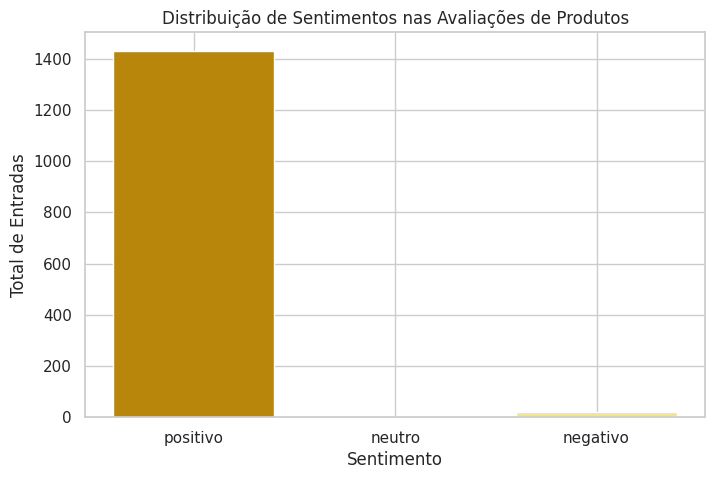

In [126]:
# gráfico de barras

# Dados para o gráfico
sentiment_counts = {
    'positivo': total_positivo,
    'neutro': total_neutro,
    'negativo': total_negativo
}

# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['darkgoldenrod', 'orange', 'khaki'])
plt.xlabel('Sentimento')
plt.ylabel('Total de Entradas')
plt.title('Distribuição de Sentimentos nas Avaliações de Produtos')
plt.show()



É possível observar que a grande maioria das entradas foram classificadas como positivas.

**Títulos das avaliações que foram classificados como negativos**


---



In [127]:
with pd.option_context('display.max_colwidth', None, 'display.max_columns', None, 'display.max_rows', None):
    display(review_product[review_product['sentiment_class'] == 'negativo'][['review_title']])

,review_title
44,handy consumes less space unlike mixer grinderthird class productnot satisfactoryit wonderful productsupernhandyone jar negation working
97,nicegood productpoorits good working ironwater comes outaveragei collect damaged item return negation received replacementnot good ok price
134,हnot good regular usepathetic battery back upgooddoes shouldvery pathetic battery negation buyworth buygood v please check buying
269,placed order doubt whether would work negation works wellvery bad remote baddoesnt works material quality nt nearby original oneno bluetooth
351,takes space negation convenient hurrynot useful cotton linen thick materiel fabricsreceived brokenonly lighter fabricthere learning curve may take people itit looks like imitation product pieces nt match properly look weakexcellent product received good conditionnot great
478,buy ikea directlygood qualityone battery set provided frother battery negation available locallyvery bad product nt buy even negation return option availablenot ikea qualityaverage qualityreally goodnot powerful enough
487,cutter speed power lownt happy wit prdctnot expectednot even worth starvery poor productnot good
543,overall goodsturdyit turns yellowno issues yellowing nownot worthyawesomeamazingiphone back cover
584,good product budget pricei purchased product shop rs including everything buy amazonworst product
715,netflix button negation working others works wellgoodcompatible vu premium tvnot like original one negation badnot good qualityworking finehalf button nt workhardness


In [128]:
# Exportar dataframe com títulos que foram classificados como negativos:
review_product[review_product['sentiment_class'] == 'negativo'][['review_title']].to_csv('review_product_negative_title.csv', index=False)

In [129]:
#data frame
df_negative_title = review_product[review_product['sentiment_class'] == 'negativo']
df_positive_title = review_product[review_product['sentiment_class'] == 'positivo']

### **Unigramas**



---



Os Unigramas nos fornecem informações de quais palavras são mais frequentes em avaliações positivas e negativas. Palavras como "bom", "excelente", "ótimo" podem ser comuns em avaliações positivas, enquanto "ruim", "péssimo", "horrível" podem ser mais frequentes em avaliações negativas.

Com os unigramas podemos identificar palavras que carregam forte conotação emocional e como elas impactam a classificação geral de sentimentos.


#### **Unigrams | 10 palavras mais comuns nas avaliações positivas**

In [130]:
from nltk import ngrams
from collections import Counter

<ipython-input-131-dcf79607320e>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-131-dcf79607320e>:20: UserWarning:

FixedFormatter should only be used together with FixedLocator



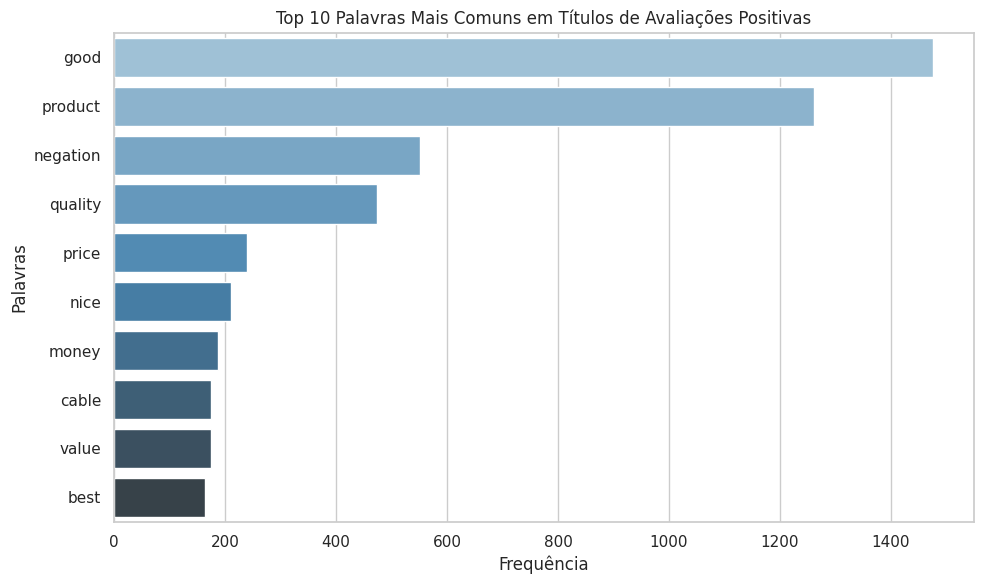

In [131]:
# Filtrar apenas os casos onde sentiment_class é "positivo"
reviews_negative = review_product[review_product['sentiment_class'] == 'positivo']

# Contar as palavras nos títulos das avaliações
all_words = ' '.join(reviews_negative['review_title']).split()
token_frequencies = Counter(all_words)

# Extrair as palavras e suas frequências
words, frequencies = zip(*token_frequencies.most_common(10))

# Configurações de estilo do seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras usando seaborn
ax = sns.barplot(y=words, x=frequencies, palette="Blues_d")
ax.set_title('Top 10 Palavras Mais Comuns em Títulos de Avaliações Positivas')
ax.set_xlabel('Frequência')
ax.set_ylabel('Palavras')
ax.set_yticklabels(words, rotation=0)

plt.tight_layout()
plt.show()

In [132]:
# adicionar palavras e frequencia em um novo data frame
df_unigrams_positive_title = pd.DataFrame({'Palavras': words, 'Frequência': frequencies})
df_unigrams_positive_title

,Palavras,Frequência
0,good,1476
1,product,1262
2,negation,552
3,quality,473
4,price,239
5,nice,211
6,money,187
7,cable,175
8,value,174
9,best,163


#### **Unigrams | 10 palavras mais comuns nas avaliações negativas**

<ipython-input-133-3d77e6340212>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-133-3d77e6340212>:20: UserWarning:

FixedFormatter should only be used together with FixedLocator



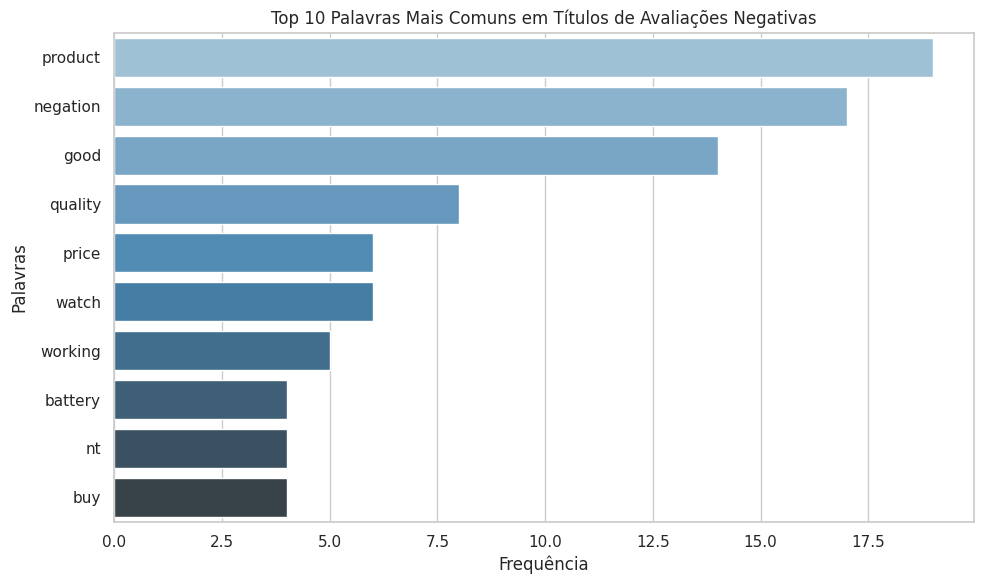

In [133]:
# Filtrar apenas os casos onde sentiment_class é "negativo"
reviews_negative = review_product[review_product['sentiment_class'] == 'negativo']

# Contar as palavras nos títulos das avaliações
all_words = ' '.join(reviews_negative['review_title']).split()
token_frequencies = Counter(all_words)

# Extrair as palavras e suas frequências
words, frequencies = zip(*token_frequencies.most_common(10))

# Configurações de estilo do seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras usando seaborn
ax = sns.barplot(y=words, x=frequencies, palette="Blues_d")
ax.set_title('Top 10 Palavras Mais Comuns em Títulos de Avaliações Negativas')
ax.set_xlabel('Frequência')
ax.set_ylabel('Palavras')
ax.set_yticklabels(words, rotation=0)

plt.tight_layout()
plt.show()

In [134]:
# adicionar palavras e frequencia em um novo data frame
df_unigrams_negative_title = pd.DataFrame({'Palavras': words, 'Frequência': frequencies})
df_unigrams_negative_title

,Palavras,Frequência
0,product,19
1,negation,17
2,good,14
3,quality,8
4,price,6
5,watch,6
6,working,5
7,battery,4
8,nt,4
9,buy,4


### **Bigramas**



---



Os bigramas nos fornecem insights de quais pares de palavras ocorrem frequentemente juntos em avaliações positivas e negativas, assim, elas nos ajudam a entender melhor o contexto em que uma palavra é usada, o que pode fornecer uma análise de sentimento mais precisa. Por exemplo, "não gostei" e "gostei muito" têm sentimentos opostos, e essa distinção é capturada melhor com bigramas do que com monogramas.

#### **Bigrams | 10 palavras mais comuns nas avaliações positivas**

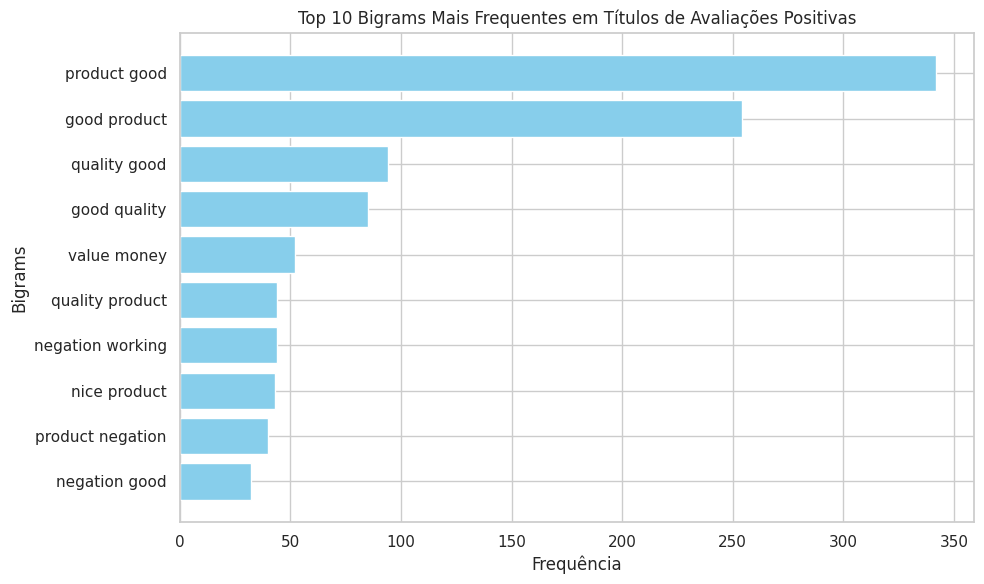

In [135]:
# Filtrar apenas os casos onde sentiment_class é "positivo"
reviews_positive = review_product[review_product['sentiment_class'] == 'positivo']

# Função para extrair bigrams de uma lista de tokens
def extract_bigrams(tokens):
    return list(ngrams(tokens, 2))

# Extrair bigrams dos títulos de avaliações negativas
all_tokens = [token for title in reviews_positive['review_title'] for token in title.split()]
bigrams = extract_bigrams(all_tokens)

# Contar a frequência dos bigrams
bigram_freq = Counter(bigrams)
sorted_bigrams = bigram_freq.most_common(10)  # Top 10 bigrams mais frequentes

# Preparar dados para o gráfico
x_labels = [' '.join(bigram) for bigram, freq in sorted_bigrams]
y_values = [freq for bigram, freq in sorted_bigrams]

# Gerar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(x_labels, y_values, color='skyblue')
plt.xlabel('Frequência')
plt.ylabel('Bigrams')
plt.title('Top 10 Bigrams Mais Frequentes em Títulos de Avaliações Positivas')
plt.gca().invert_yaxis()  # Inverte a ordem dos bigrams para o mais frequente aparecer no topo
plt.tight_layout()
plt.show()

In [136]:
#dataframe
df_bigrams_positive_title = pd.DataFrame({'Bigrams': x_labels, 'Frequência': y_values})
df_bigrams_positive_title

,Bigrams,Frequência
0,product good,342
1,good product,254
2,quality good,94
3,good quality,85
4,value money,52
5,quality product,44
6,negation working,44
7,nice product,43
8,product negation,40
9,negation good,32


#### **Bigrams | 10 palavras mais comuns nas avaliações negativas**

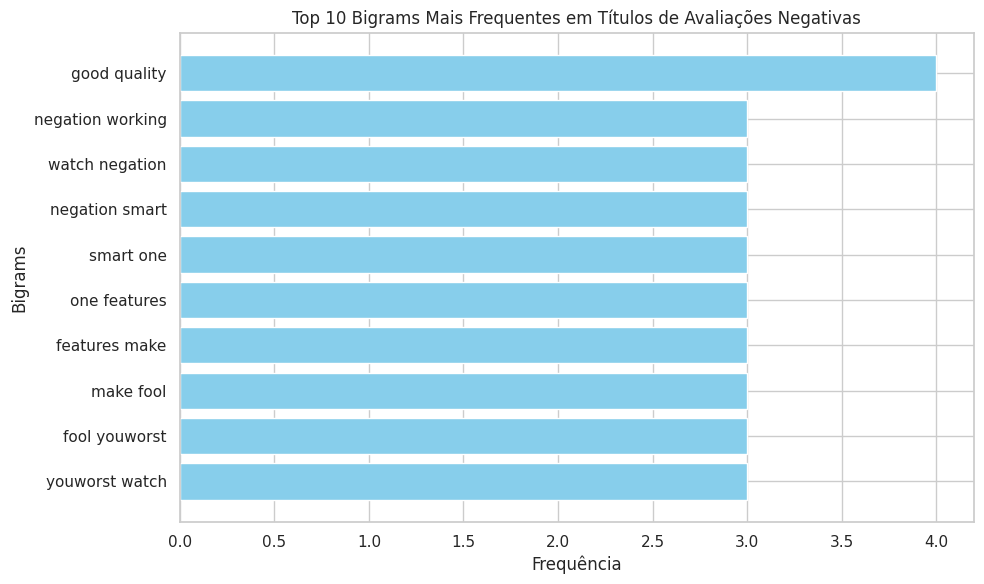

In [137]:
# Filtrar apenas os casos onde sentiment_class é "negativo"
reviews_negative = review_product[review_product['sentiment_class'] == 'negativo']

# Função para extrair bigrams de uma lista de tokens
def extract_bigrams(tokens):
    return list(ngrams(tokens, 2))

# Extrair bigrams dos títulos de avaliações negativas
all_tokens = [token for title in reviews_negative['review_title'] for token in title.split()]
bigrams = extract_bigrams(all_tokens)

# Contar a frequência dos bigrams
bigram_freq = Counter(bigrams)
sorted_bigrams = bigram_freq.most_common(10)  # Top 10 bigrams mais frequentes

# Preparar dados para o gráfico
x_labels = [' '.join(bigram) for bigram, freq in sorted_bigrams]
y_values = [freq for bigram, freq in sorted_bigrams]

# Gerar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(x_labels, y_values, color='skyblue')
plt.xlabel('Frequência')
plt.ylabel('Bigrams')
plt.title('Top 10 Bigrams Mais Frequentes em Títulos de Avaliações Negativas')
plt.gca().invert_yaxis()  # Inverte a ordem dos bigrams para o mais frequente aparecer no topo
plt.tight_layout()
plt.show()

In [138]:
# Filtrar apenas os casos onde sentiment_class é "negativo"
reviews_negative = review_product[review_product['sentiment_class'] == 'negativo']

# Função para extrair bigrams de uma lista de tokens
def extract_bigrams(tokens):
    return list(ngrams(tokens, 2))

# Extrair bigrams dos títulos de avaliações negativas
all_tokens = [token for title in reviews_negative['review_title'] for token in title.split()]
bigrams = extract_bigrams(all_tokens)

# Contar a frequência dos bigrams
bigram_freq = Counter(bigrams)
sorted_bigrams = bigram_freq.most_common(10)  # Top 10 bigrams mais frequentes

# Preparar dados para a tabela
bigram_data = {'Bigram': [' '.join(bigram) for bigram, freq in sorted_bigrams],
               'Frequência': [freq for bigram, freq in sorted_bigrams]}

# Criar dataframe
bigram_df = pd.DataFrame(bigram_data)


df_bigrams_negative_title = bigram_df
df_bigrams_negative_title

,Bigram,Frequência
0,good quality,4
1,negation working,3
2,watch negation,3
3,negation smart,3
4,smart one,3
5,one features,3
6,features make,3
7,make fool,3
8,fool youworst,3
9,youworst watch,3


Principais bigramas negativos:
*	Good quality
*	Negation working
*	Negation smart
*	Smart one
*	One features
*	Features make
*	Make fool
*	Fool youworst
*	Youworst watch

Os principais bigramas apresentam reclamações como:
* “**Negation working – Não funciona**”, o que pode representar que o produto não funciona ou não funciona como o cliente esperava;
* “**Watch Negation**”, junto com "**Watch negation**", “**Smart one**” e  "**Youworst watch**" indicam que o produto não é um smart watch.
* "**One features**", "**Features make**", "**Make fool**", "**Fool youworst**" podem indicar que vendedor enganou os clientes em relação às características do produto


---



### **Trigramas**



---



Os trigramas, que são conjuntos de três palavras consecutivas, podem fornecer uma visão mais detalhada sobre o feedback dos usuários porque capturam contextos que revelam mais sobre a opinião dos usuários, como "não recomendo comprar" ou "produto de ótima qualidade".

#### **Trigrams | 10 palavras mais comuns nas avaliações positivas**

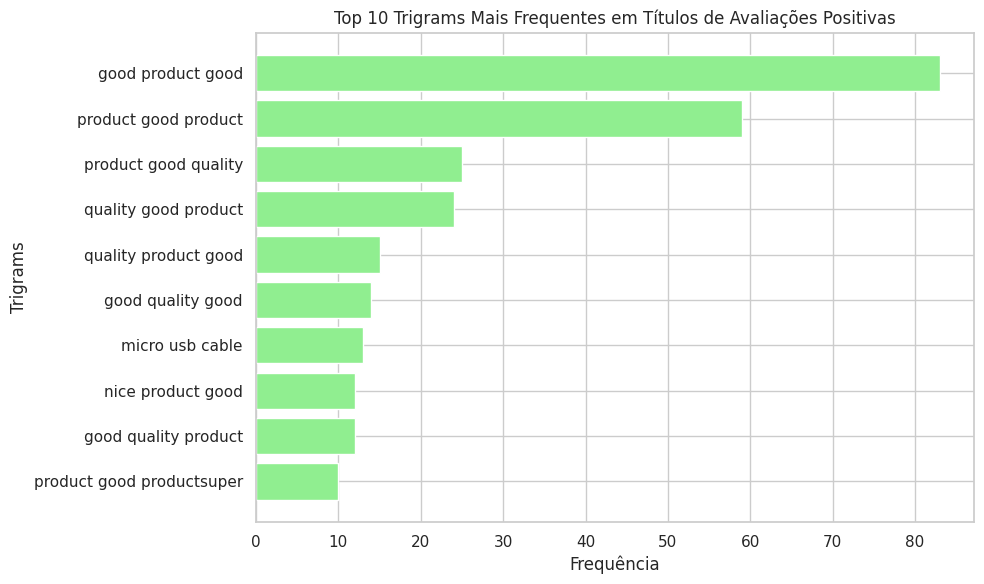

In [139]:
# Filtrar apenas os casos onde sentiment_class é "positivo"
review_positive = review_product[review_product['sentiment_class'] == 'positivo']

# Função para extrair trigrams de uma lista de tokens
def extract_trigrams(tokens):
    return list(ngrams(tokens, 3))

# Extrair trigrams dos títulos de avaliações negativas
all_tokens = [token for title in review_positive['review_title'] for token in title.split()]
trigrams = extract_trigrams(all_tokens)

# Contar a frequência dos trigrams
trigram_freq = Counter(trigrams)
sorted_trigrams = trigram_freq.most_common(10)  # Top 10 trigrams mais frequentes

# Preparar dados para o gráfico
x_labels = [' '.join(trigram) for trigram, freq in sorted_trigrams]
y_values = [freq for trigram, freq in sorted_trigrams]

# Gerar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(x_labels, y_values, color='lightgreen')
plt.xlabel('Frequência')
plt.ylabel('Trigrams')
plt.title('Top 10 Trigrams Mais Frequentes em Títulos de Avaliações Positivas')
plt.gca().invert_yaxis()  # Inverte a ordem dos trigrams para o mais frequente aparecer no topo
plt.tight_layout()
plt.show()

In [140]:
#data frame
df_trigrams_positive = pd.DataFrame({'Trigrams': x_labels, 'Frequência': y_values})
df_trigrams_positive

,Trigrams,Frequência
0,good product good,83
1,product good product,59
2,product good quality,25
3,quality good product,24
4,quality product good,15
5,good quality good,14
6,micro usb cable,13
7,nice product good,12
8,good quality product,12
9,product good productsuper,10


#### **Trigrams | 10 palavras mais comuns nas avaliações negativas**

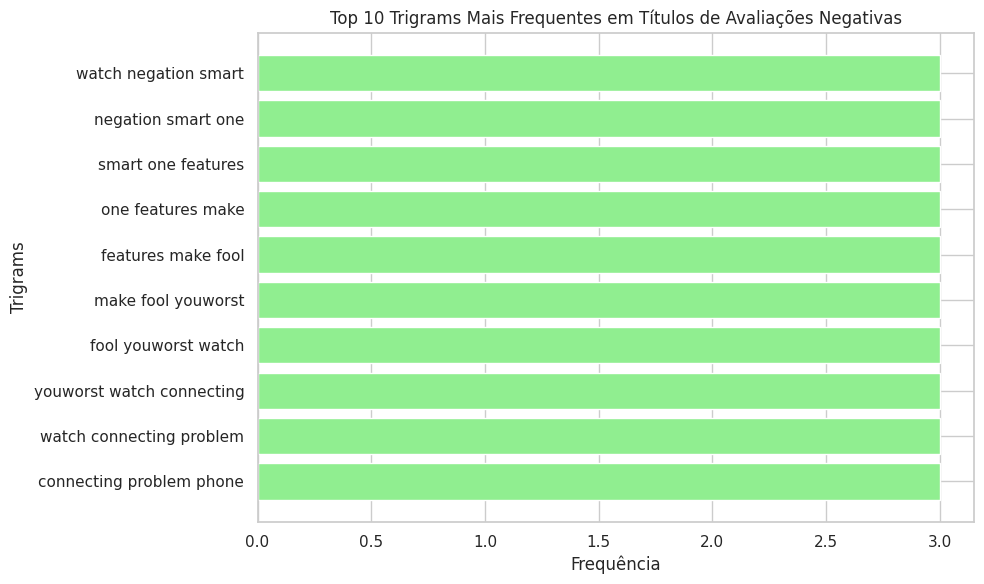

In [141]:
# Filtrar apenas os casos onde sentiment_class é "negativo"
review_negative = review_product[review_product['sentiment_class'] == 'negativo']

# Função para extrair trigrams de uma lista de tokens
def extract_trigrams(tokens):
    return list(ngrams(tokens, 3))

# Extrair trigrams dos títulos de avaliações negativas
all_tokens = [token for title in review_negative['review_title'] for token in title.split()]
trigrams = extract_trigrams(all_tokens)

# Contar a frequência dos trigrams
trigram_freq = Counter(trigrams)
sorted_trigrams = trigram_freq.most_common(10)  # Top 10 trigrams mais frequentes

# Preparar dados para o gráfico
x_labels = [' '.join(trigram) for trigram, freq in sorted_trigrams]
y_values = [freq for trigram, freq in sorted_trigrams]

# Gerar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(x_labels, y_values, color='lightgreen')
plt.xlabel('Frequência')
plt.ylabel('Trigrams')
plt.title('Top 10 Trigrams Mais Frequentes em Títulos de Avaliações Negativas')
plt.gca().invert_yaxis()  # Inverte a ordem dos trigrams para o mais frequente aparecer no topo
plt.tight_layout()
plt.show()

In [142]:
# Filtrar apenas os casos onde sentiment_class é "negativo"
review_negative = review_product[review_product['sentiment_class'] == 'negativo']

# Função para extrair trigrams de uma lista de tokens
def extract_trigrams(tokens):
    return list(ngrams(tokens, 3))

# Extrair trigrams dos títulos de avaliações negativas
all_tokens = [token for title in review_negative['review_title'] for token in title.split()]
trigrams = extract_trigrams(all_tokens)

# Contar a frequência dos trigrams
trigram_freq = Counter(trigrams)
sorted_trigrams = trigram_freq.most_common(10)  # Top 10 trigrams mais frequentes

# Preparar dados para a tabela
trigram_data = {'Trigram': [' '.join(trigram) for trigram, freq in sorted_trigrams],
                'Frequência': [freq for trigram, freq in sorted_trigrams]}

# Criar dataframe
trigram_df = pd.DataFrame(trigram_data)

df_trigrams_negative_title = trigram_df
df_trigrams_negative_title

,Trigram,Frequência
0,watch negation smart,3
1,negation smart one,3
2,smart one features,3
3,one features make,3
4,features make fool,3
5,make fool youworst,3
6,fool youworst watch,3
7,youworst watch connecting,3
8,watch connecting problem,3
9,connecting problem phone,3


Principais Trigramas:

* watch negation smart     
* negation smart one           
* smart one features           
* one features make           
* features make fool           
* make fool youworst           
* fool youworst watch           
* youworst watch connecting           
* watch connecting problem           
* connecting problem phone


Assim como os bigramas, os trigramas negativos continuam falando características ruins em relação a possivelmente smart watchs.

### **Exportando**

In [143]:
from google.colab import drive
import os

# Montar o Google Drive
drive.mount('/content/drive')

# Definir o caminho do diretório
dir_path = '/content/drive/My Drive/Laboratoria/Projeto 4/Arquivos Finais - CSV/'

# Criar o diretório se ele não existir
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

ValueError: mount failed

In [ ]:
df_sentiment_title
df_negative_title
df_positive_title
df_unigrams_positive_title
df_unigrams_negative_title
df_bigrams_positive_title
df_bigrams_negative_title
df_trigrams_positive_title
df_trigrams_negative_title

#exportando
df_sentiment_title.to_csv(dir_path + 'df_sentiment_title.csv', index=False)
df_negative_title.to_csv(dir_path + 'df_negative_title.csv', index=False)
df_positive_title.to_csv(dir_path + 'df_positive_title.csv', index=False)
df_unigrams_positive_title.to_csv(dir_path + 'df_unigrams_positive_title.csv', index=False)
df_unigrams_negative_title.to_csv(dir_path + 'df_unigrams_negative_title.csv', index=False)
df_bigrams_negative_title.to_csv(dir_path + 'df_bigrams_negative_title.csv', index=False)
df_bigrams_positive_title.to_csv(dir_path + 'df_bigrams_positive_title.csv', index=False)
df_trigrams_positive_title.to_csv(dir_path + 'df_trigrams_positive_title.csv', index=False)
df_trigrams_negative_title.to_csv(dir_path + 'df_trigrams_negative_title.csv', index=False)


# **Conteúdo das Avaliações**

Nessa seção, iremos fazer a análise dos sentimentos, examinando o conteúdo das avaliações.


## **Tratamento dos textos**

In [ ]:
# Verificar se existem valores nulos na coluna review_content:

review_product['review_content'].isnull().sum()

In [ ]:
# Substituir quebras de linha (\n e \r) da coluna review_title por espaços em uma lista de textos:

import re

def re_breakline(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """

    # Applying regex to replace newlines with spaces
    return [re.sub(r'[\n\r]', ' ', r) for r in text_list]

# Aplicando a função na coluna 'comment' do DataFrame df_comments
review_product['review_content'] = re_breakline(review_product['review_content'].tolist())

In [ ]:
# Remover emojis:

# Função para remover emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # símbolos & pictogramas
                               u"\U0001F680-\U0001F6FF"  # transporte e símbolos de mapas
                               u"\U0001F1E0-\U0001F1FF"  # bandeiras (iOS)
                               u"\U00002500-\U00002BEF"  # caracteres chineses comuns
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # flags (iOS)
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Remover emojis:
review_product['review_content'] = review_product['review_content'].apply(lambda x: remove_emojis(str(x)))

In [ ]:
# Remover todos os caracteres que não são alfanuméricos (\w) ou espaços em branco (\s):
review_product['review_content'] = review_product['review_content'].str.replace(r'[^\w\s]', '', regex=True)

In [ ]:
# Converter os textos da coluna review_content para letras minúsculas:
review_product['review_content'] = review_product['review_content'].str.lower()

In [ ]:
# Substituir links pela palavra link na coluna review_content:
review_product['review_content'] = review_product['review_content'].str.replace(r'http\S+', 'link', regex=True)

In [ ]:
# Substituir datas pela palavra data na coluna review_content:
review_product['review_content'] = review_product['review_content'].str.replace(r'\d{4}-\d{2}-\d{2}', 'data', regex=True)

In [ ]:
# Substituir símbolos monetários da coluna review_content por "monetary_value":
review_product['review_content'] = review_product['review_content'].str.replace(r'\$\d+', 'monetary_value', regex=True)

In [ ]:
# Substituir valores numéricos da coluna review_content por "numeric_value":
review_product['review_content'] = review_product['review_content'].str.replace(r'\d+', 'numeric_value', regex=True)

In [ ]:
# Substituir palavras de negação da coluna review_content por "negation":
review_product['review_content'] = review_product['review_content'].str.replace(r'\b(no|not|never)\b', 'negation', regex=True)

In [ ]:
# Eliminar espaços em branco desnecessários da coluna review_content:
review_product['review_content'] = review_product['review_content'].str.strip()

In [ ]:
# Remoção de espaços extras entre as palavras:
review_product['review_content'] = review_product['review_content'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))

In [ ]:
# Substituir "productgood" por "product good" na coluna review_content:
review_product['review_content'] = review_product['review_content'].str.replace(r'productgood', 'product good', regex=True)

# Substituir "qualitygood" por "quality good" na coluna review_content:
review_product['review_content'] = review_product['review_content'].str.replace(r'qualitygood', 'quality good', regex=True)

In [ ]:
# Detectar o idioma de cada título
review_product['language_content'] = review_product['review_content'].apply(detect)

In [ ]:
# Agrupar e contar por idioma:
language_counts_content = review_product.groupby('language_content').size().reset_index(name='count')
language_counts_content

In [ ]:
import spacy

# Carregar o modelo de linguagem do spaCy
nlp = spacy.load("en_core_web_sm")

# Função para filtrar palavras não inglesas
def filter_non_english_words(text):
    doc = nlp(text)
    # Lista de palavras comuns em inglês (usando vocabulário spaCy)
    common_english_words = set([token.text for token in nlp.vocab if token.is_alpha and token.is_lower])
    filtered_words = [token.text for token in doc if token.is_alpha and token.text.lower() in common_english_words]
    return " ".join(filtered_words)

# Aplicar a função para filtrar palavras não inglesas
review_product['review_content'] = review_product['review_content'].apply(filter_non_english_words)

review_product.head(3)

In [ ]:
# Função para remover stopwords
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Aplicando a função remove_stopwords à coluna review_content
review_product['review_content'] = review_product['review_content'].apply(remove_stopwords)

In [ ]:
# Tokenização:

# Baixar os recursos necessários para tokenização
nltk.download('punkt')

# Definir uma função para tokenizar o texto
def tokenize_text(text):
    return word_tokenize(text)

# Aplicar a tokenização em cada conteúdo de avaliação
review_product['tokenized_content'] = review_product['review_content'].apply(tokenize_text)

# Exibir o DataFrame resultante
review_product.head(3)

In [ ]:
# Lematização:

# Baixar recursos necessários para lematização
nltk.download('wordnet')
nltk.download('omw-1.4')

# Definir a lematização
lemmatizer = WordNetLemmatizer()

# Definir uma função para lematizar tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Aplicar a função de lematização em cada lista de tokens
review_product['lemmatized_tokens_content'] = review_product['tokenized_content'].apply(lemmatize_tokens)

# Exibir o DataFrame resultante
review_product.head(3)

## **Análise de Sentimentos**

In [ ]:
# Instalar as bibliotecas necessárias

# Inicializar o analisador VADER
analyzer = SentimentIntensityAnalyzer()

# Função para analisar o sentimento usando VADER
def analyze_sentiment_vader(text):
    if not text or (isinstance(text, float) and math.isnan(text)):
        return None

    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Usar o valor compound para uma visão geral do sentimento

# Supondo que review_product seja seu DataFrame e 'lemmatized_tokens' a coluna de texto
review_product['sentiment_content'] = review_product['lemmatized_tokens_content'].apply(lambda x: analyze_sentiment_vader(str(x)))

# Remover linhas onde a análise de sentimento retornou None
review_product = review_product.dropna(subset=['sentiment_content'])

# Mostrar os resultados
print(review_product[['lemmatized_tokens_content', 'sentiment_content']])

In [ ]:
# Função para classificar o sentimento
def classify_sentiment(score):
    if score >= 0.05:
        return 'positivo'
    elif score <= -0.05:
        return 'negativo'
    else:
        return 'neutro'

# Aplicar a função de classificação
review_product['sentiment_class_content'] = review_product['sentiment_content'].apply(classify_sentiment)

# Mostrar os resultados
print(review_product[['lemmatized_tokens_content', 'sentiment_content', 'sentiment_class_content']])

### **Entradas classificadas como positivas, negativas ou neutras**



---


**Total por classificação**


---



In [ ]:
# Contar total de "negativo" na coluna sentiment_class_content:
total_negativo_2 = review_product[review_product['sentiment_class_content'] == 'negativo'].shape[0]
print("Total de 'negativo':", total_negativo_2)

# Contar total de "positivo" na coluna sentiment_class_content:
total_positivo_2 = review_product[review_product['sentiment_class_content'] == 'positivo'].shape[0]
print("Total de 'positivo':", total_positivo_2)

# Contar total de "neutro" na coluna sentiment_class_content:
total_neutro_2 = review_product[review_product['sentiment_class_content'] == 'neutro'].shape[0]
print("Total de 'neutro':", total_neutro_2)

**Gráfico com a distribuição por classificação**


---



In [ ]:
# gráfico de barras

# Dados para o gráfico
sentiment_counts = {
    'positivo': total_positivo_2,
    'negativo': total_negativo_2,
    'neutro': total_neutro_2
}

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['darkgoldenrod', 'orange', 'khaki'])
plt.xlabel('Sentimento')
plt.ylabel('Total de Entradas')
plt.title('Distribuição de Sentimentos nas Avaliações de Produtos')
plt.show()



É possível observar que a grande maioria das entradas foram classificadas como **positivas**.

**Conteúdo das avaliações classificadas como negativas**


---



In [ ]:
with pd.option_context('display.max_colwidth', None, 'display.max_columns', None, 'display.max_rows', None):
    display(review_product[review_product['sentiment_class_content'] == 'negativo'][['review_title','review_content']])

In [ ]:
# Exportar dataframe com o conteúdo das avaliações negativas:
review_product[review_product['sentiment_class_content'] == 'negativo'][['review_content']].to_csv('review_product_negative_content.csv', index=False)

In [ ]:
# colocar o conjunto de entradas positivas e negativas em um data frame
df_negativo = review_product[review_product['sentiment_class_content'] == 'negativo']
df_positivo = review_product[review_product['sentiment_class_content'] == 'positivo']

df_avaliacoes = pd.concat([df_negativo, df_positivo])
df_avaliacoes

### **Unigramas**



---



#### **Unigrams | 10 palavras mais comuns nas avaliações positivas**

In [ ]:
# Filtrar apenas os casos onde sentiment_class_content é "positivo"
reviews_negative = review_product[review_product['sentiment_class_content'] == 'positivo']

# Contar as palavras no conteúdo das avaliações
all_words = ' '.join(reviews_negative['review_content']).split()
token_frequencies = Counter(all_words)

# Extrair as palavras e suas frequências
words_positive, frequencies_positive = zip(*token_frequencies.most_common(10))

# Configurações de estilo do seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras usando seaborn
ax = sns.barplot(y=words_positive, x=frequencies_positive, palette="Blues_d")
ax.set_title('Top 10 Palavras Mais Comuns em Avaliações Positivas')
ax.set_xlabel('Frequência')
ax.set_ylabel('Palavras')
ax.set_yticklabels(words_positive, rotation=0)

plt.tight_layout()
plt.show()




In [ ]:
# adicionar palavras e frequencia em um novo data frame
df_unigramas_positive = pd.DataFrame({'Palavras': words_positive, 'Frequência': frequencies_positive})
df_unigramas_positive

#### **Unigrams | 10 palavras mais comuns nas avaliações negativas**

In [ ]:
# Filtrar apenas os casos onde sentiment_class_content é "negativo"
reviews_negative = review_product[review_product['sentiment_class_content'] == 'negativo']

# Contar as palavras no conteúdo das avaliações
all_words = ' '.join(reviews_negative['review_content']).split()
token_frequencies = Counter(all_words)

# Extrair as palavras e suas frequências
words, frequencies = zip(*token_frequencies.most_common(10))

# Configurações de estilo do seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras usando seaborn
ax = sns.barplot(y=words, x=frequencies, palette="Blues_d")
ax.set_title('Top 10 Palavras Mais Comuns em Avaliações Negativas')
ax.set_xlabel('Frequência')
ax.set_ylabel('Palavras')
ax.set_yticklabels(words, rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
# adicionar palavras e frequencia em um novo data frame
df_unigramas_negative = pd.DataFrame({'Palavras': words, 'Frequência': frequencies})
df_unigramas_negative

### **Bigramas**



---



#### **Bigrams | 10 palavras mais comuns nas avaliações positivas**

In [ ]:
# Filtrar apenas os casos onde sentiment_class_content é "positivo"
reviews_positive = review_product[review_product['sentiment_class_content'] == 'positivo']

# Função para extrair bigrams de uma lista de tokens
def extract_bigrams(tokens):
    return list(ngrams(tokens, 2))

# Extrair bigrams do conteúdo das avaliações negativas
all_tokens = [token for title in reviews_positive['review_content'] for token in title.split()]
bigrams = extract_bigrams(all_tokens)

# Contar a frequência dos bigrams
bigram_freq = Counter(bigrams)
sorted_bigrams = bigram_freq.most_common(10)  # Top 10 bigrams mais frequentes

# Preparar dados para o gráfico
x_labels = [' '.join(bigram) for bigram, freq in sorted_bigrams]
y_values = [freq for bigram, freq in sorted_bigrams]

# Gerar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(x_labels, y_values, color='skyblue')
plt.xlabel('Frequência')
plt.ylabel('Bigrams')
plt.title('Top 10 Bigrams Mais Frequentes em Avaliações Positivas')
plt.gca().invert_yaxis()  # Inverte a ordem dos bigrams para o mais frequente aparecer no topo
plt.tight_layout()
plt.show()



In [ ]:
#dataframe
df_bigrams_positive = pd.DataFrame({'Bigrams': x_labels, 'Frequência': y_values})
df_bigrams_positive

#### **Bigrams | 10 palavras mais comuns nas avaliações negativas**

In [ ]:
# Filtrar apenas os casos onde sentiment_class_content é "negativo"
reviews_positive = review_product[review_product['sentiment_class_content'] == 'negativo']

# Função para extrair bigrams de uma lista de tokens
def extract_bigrams(tokens):
    return list(ngrams(tokens, 2))

# Extrair bigrams do conteúdo das avaliações negativas
all_tokens = [token for title in reviews_positive['review_content'] for token in title.split()]
bigrams = extract_bigrams(all_tokens)

# Contar a frequência dos bigrams
bigram_freq = Counter(bigrams)
sorted_bigrams = bigram_freq.most_common(10)  # Top 10 bigrams mais frequentes

# Preparar dados para o gráfico
x_labels = [' '.join(bigram) for bigram, freq in sorted_bigrams]
y_values = [freq for bigram, freq in sorted_bigrams]

# Gerar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(x_labels, y_values, color='skyblue')
plt.xlabel('Frequência')
plt.ylabel('Bigrams')
plt.title('Top 10 Bigrams Mais Frequentes em Avaliações Negativas')
plt.gca().invert_yaxis()  # Inverte a ordem dos bigrams para o mais frequente aparecer no topo
plt.tight_layout()
plt.show()

In [ ]:
#dataframe
df_bigrams_negative = pd.DataFrame({'Bigrams': x_labels, 'Frequência': y_values})
df_bigrams_negative

Vamos analisar os principais bigramas negativos:

Bigramas mais frequentes em avaliações negativas

- Negative come - Não veio
- Product come - produto veio.
- Quality poor - qualidade ruim
- Bad service - serviço ruim
- Installation guy - rapaz das instalação
- Good product - bom produto
- Google tv
- Charging cable - cabo de recarga
- Fast charging - carregamento rápido

1. **Negative come**:
    
    Os clientes estão reclamando que o produto não foi entregue ou que a entrega não atendeu às expectativas. Isso aponta para problemas graves no serviço de entrega, que precisam ser investigados e resolvidos imediatamente.
    
2. **Product come**:
    
    Isso pode sugerir que os clientes estão comentando sobre a condição em que o produto chegou. Frases como "product came damaged" ou "product came late" são possíveis contextos. Isso aponta para possíveis problemas logísticos ou de qualidade no transporte.
    
3. **Quality poor**:
    
    Há uma clara indicação de que os clientes estão insatisfeitos com a qualidade do produto. Isso pode levar a uma revisão dos padrões de qualidade e controle do produto.
    
4. **Bad service**:
    
    Os clientes estão insatisfeitos com o atendimento ao cliente ou serviços associados ao produto. Melhorar a formação dos funcionários de suporte ao cliente e revisar os procedimentos de atendimento pode ser necessário.
    
5. **Installation guy**:
    
    Isso pode indicar problemas com o serviço de instalação oferecido. Pode ser útil investigar o desempenho dos técnicos de instalação e a satisfação dos clientes com o serviço prestado.
    
6. **Good product**:
    
    Embora este bigrama seja positivo, seu aparecimento em avaliações negativas pode indicar um contexto em que um produto bom é associado a uma experiência negativa. Por exemplo, "Good product but bad service" ou "Good product but came damaged".
    
7. **Google tv**:
    
    Este bigrama sugere que os clientes mencionam "Google TV" em suas avaliações negativas. Pode haver problemas específicos relacionados a esse produto ou integração com ele que precisam ser investigados.
    
8. **Charging cable**:
    
    Problemas relacionados ao cabo de carregamento são mencionados. Isso pode indicar que os clientes estão enfrentando dificuldades com a durabilidade, compatibilidade ou desempenho dos cabos fornecidos.
    
9. **Fast charging**:
    
    A funcionalidade de carregamento rápido pode estar causando insatisfação. Isso pode incluir reclamações sobre a velocidade real de carregamento, problemas de compatibilidade, ou questões de sobreaquecimento.

### **Trigramas**



---



#### **Trigrams | 10 palavras mais comuns nas avaliações positivas**

In [ ]:
# Filtrar apenas os casos onde sentiment_class_content é "positivo"
review_positive = review_product[review_product['sentiment_class_content'] == 'positivo']

# Função para extrair trigrams de uma lista de tokens
def extract_trigrams(tokens):
    return list(ngrams(tokens, 3))

# Extrair trigrams do conteúdo de avaliações positivas
all_tokens = [token for title in review_positive['review_content'] for token in title.split()]
trigrams = extract_trigrams(all_tokens)

# Contar a frequência dos trigrams
trigram_freq = Counter(trigrams)
sorted_trigrams = trigram_freq.most_common(10)  # Top 10 trigrams mais frequentes

# Preparar dados para o gráfico
x_labels = [' '.join(trigram) for trigram, freq in sorted_trigrams]
y_values = [freq for trigram, freq in sorted_trigrams]

# Gerar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(x_labels, y_values, color='lightgreen')
plt.xlabel('Frequência')
plt.ylabel('Trigrams')
plt.title('Top 10 Trigrams Mais Frequentes em Avaliações Positivas')
plt.gca().invert_yaxis()  # Inverte a ordem dos trigrams para o mais frequente aparecer no topo
plt.tight_layout()
plt.show()



In [ ]:
#data frame
df_trigrams_positive = pd.DataFrame({'Trigrams': x_labels, 'Frequência': y_values})
df_trigrams_positive

#### **Trigrams | 10 palavras mais comuns nas avaliações negativas**

In [ ]:
# Filtrar apenas os casos onde sentiment_class_content é "negativo"
review_positive = review_product[review_product['sentiment_class_content'] == 'negativo']

# Função para extrair trigrams de uma lista de tokens
def extract_trigrams(tokens):
    return list(ngrams(tokens, 3))

# Extrair trigrams do conteúdo de avaliações negativas
all_tokens = [token for title in review_positive['review_content'] for token in title.split()]
trigrams = extract_trigrams(all_tokens)

# Contar a frequência dos trigrams
trigram_freq = Counter(trigrams)
sorted_trigrams = trigram_freq.most_common(10)  # Top 10 trigrams mais frequentes

# Preparar dados para o gráfico
x_labels = [' '.join(trigram) for trigram, freq in sorted_trigrams]
y_values = [freq for trigram, freq in sorted_trigrams]

# Gerar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(x_labels, y_values, color='lightgreen')
plt.xlabel('Frequência')
plt.ylabel('Trigrams')
plt.title('Top 10 Trigrams Mais Frequentes em Avaliações Negativas')
plt.gca().invert_yaxis()  # Inverte a ordem dos trigrams para o mais frequente aparecer no topo
plt.tight_layout()
plt.show()

In [ ]:
# Filtrar apenas os casos onde sentiment_class_content é "negativo"
review_negative = review_product[review_product['sentiment_class_content'] == 'negativo']

# Função para extrair trigrams de uma lista de tokens
def extract_trigrams(tokens):
    return list(ngrams(tokens, 3))

# Extrair trigrams do conteúdo de avaliações negativas
all_tokens = [token for title in review_negative['review_content'] for token in title.split()]
trigrams = extract_trigrams(all_tokens)

# Contar a frequência dos trigrams
trigram_freq = Counter(trigrams)
sorted_trigrams = trigram_freq.most_common(10)  # Top 10 trigrams mais frequentes

# Preparar dados para a tabela
trigram_data = {'Trigram': [' '.join(trigram) for trigram, freq in sorted_trigrams],
                'Frequência': [freq for trigram, freq in sorted_trigrams]}

# Criar dataframe
trigram_df = pd.DataFrame(trigram_data)

# Exibir tabela
df_trigrams_negative = trigram_df
df_trigrams_negative


Trigramas mais frequentes em avaliações negativas:
* Câmera display poor
*	Display poor quality
*	Poor quality batery
*	Quality batery good
*	Batery good nothing
*	Good nothing badnice
*	Nothing badnice phone
*	Badnice phone reasonable
*	Phone reasonable pricegoodnicevalue
*	Reasonable pricegoodnicevalue moneytheek


Os trigramas mais frequentes se tratam de termos associados a baixa qualidade dos produtos, como ter um display ruim, baixa qualidade da bateria, entre outros termos que estão associados ao descontentamento em relação aos produtos adquiridos.

Esses trigramas, trazem os pontos que mais levam avaliações negativas e servem como um norte em relação aos produtos que são vendidos na Amazon.


### Exportando

In [ ]:
from google.colab import drive
import os

# Montar o Google Drive
drive.mount('/content/drive')

# Definir o caminho do diretório
dir_path = '/content/drive/My Drive/Laboratoria/Projeto 4/Arquivos Finais - CSV/'

# Criar o diretório se ele não existir
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

In [ ]:
df_sentiment
df_negativo
df_positivo
df_unigramas_positive
df_unigramas_negative
df_bigrams_positive
df_trigrams_positive
df_trigrams_negative
df_avaliacoes

# exportando
df_sentiment.to_csv(dir_path + 'df_sentiment.csv', index=False)
df_negativo.to_csv(dir_path + 'df_negativo.csv', index=False)
df_positivo.to_csv(dir_path + 'df_positivo.csv', index=False)
df_unigramas_positive.to_csv(dir_path + 'df_unigramas_positive.csv', index=False)
df_unigramas_negative.to_csv(dir_path + 'df_unigramas_negative.csv', index=False)
df_bigrams_negative.to_csv(dir_path + 'df_bigrams_negative.csv', index=False)
df_bigrams_positive.to_csv(dir_path + 'df_bigrams_positive.csv', index=False)
df_trigrams_positive.to_csv(dir_path + 'df_trigrams_positive.csv', index=False)
df_trigrams_negative.to_csv(dir_path + 'df_trigrams_negative.csv', index=False)
df_avaliacoes.to_csv(dir_path + 'df_avaliaçoes.csv', index=False)


